# Credit EDA Assignment

## Business Understanding:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application
Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.
Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

## Business Objectives / Problem Statement:

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Expected Results

Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.
Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)
Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.
Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.
Identify if there is data imbalance in the data. Find the ratio of data imbalance.
Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.
Hint: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.
Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.
Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  
Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 
You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

### EDA Approach/Steps:

    
    1. Understanding business scenario and objective of performing EDA
    
    2. Data collection and inspection for current application dataframe
    
    3. Data cleaning:
        a. Fixing Rows and columns 
            - Incorrect or extra rows
            - Summary rows
            - Missing or inconsistent or misalligned column names
        b. Handling missing values: 
            - Dropping columns with > 35% missing values
            - Imputing remaining missing values appropriately using mean, mode, median, Unknown type
            - Handling negative values in numeric columns where appropriate. e.g. Days columns
            - Handling any disguised missing values like XNA, XAP, etc
            - Standardising text/numbers as required. e.g. converting flags to 1 or 0, etc
            - Identifying and dropping additional columns not relevant for this analysis
            - Creating derived columns as appropriate. e.g. 
                - Summing all Credit Bureau Request to single column
                - Converting Days birth to Age, Days employed to Years employed
        c. Oulier detection and treatment:
            - Removing outliers
            - Binning ordered categorical columns to segments. e.g. Income amount, Credit amount, External source
        d. Identifying data imbalance and ratio
        
    4. Analysis and gaining insights from data:
        a. Univariate analysis on categorical unordered columns
        b. Univariate analysis on categorical ordered columns
        b. Univariate analysis on numerical columns
        c. Univariate analysis on segmented ordered categorical columns
        d. Bivariate and multivariate analysis on:
            - numeric-numeric columns
            - numeric-categorical columns
            - categorical-categorical columns
            - segmented categorical columns
    
    5. Data collection, inspection, cleaning and analysis for previous application dataframe
        
    6. Merging current and previous application dataframes using SK_ID_CURR (Loan ID)
    
    7. Cleaning merged dataframe (handling missing values, standardising, etc)
    
    8. Performing univariate, bivariate and multivariate analysis on merged dataframe
    
    9. Providing insights and recommendations
    
   

#### Importing the required libraries

In [466]:
# Filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [467]:
# Importing NumPy, Pandas, Matplotlib (Pyplot sub module) and Seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [468]:
# Display options setting to be able to view all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Data Cleaning

### Data Collection and Inspection

There are two datasets available for analysis:

df_curr_app dataframe is used for 'application_data.csv' i.e. for current application data

df_prev_app dataframe is used for 'previous_application.csv' i.e. for previous application data


#### Current Application Dataframe

In [469]:
# Reading'application_data.csv' into df_curr_app dataframe and viewing first 5 records
df_curr_app = pd.read_csv('application_data.csv')
df_curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [470]:
# Viewing last 5 records of df_curr_app dataframe
df_curr_app.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [471]:
# Inspecting dimension of df_curr_app dataframe

df_curr_app.shape

(307511, 122)

In [472]:
# Inspecting columns available and data type
df_curr_app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [473]:
# Inspecting the statistical summary of numerical features in df_curr_app dataframe 
df_curr_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Fixing the rows and columns

Based on the above review of the both current application (df_curr_app) and previous application (df_prev_app) dataframes, it doesn't seem to need below types of fixing for rows or columns. There are NO: 
 - incorrect or extra rows
 - summary rows 
 - missing or inconsistent or misalligned column names 

In [474]:
# Checking rows where more than 50% missing values are present
len(df_curr_app[df_curr_app.isnull().sum(axis=1)/df_curr_app.shape[1]*100 > 50])

0

There are no rows with more than 50% columns values missing. Hence, deletion of rows due to missing values is not required.

### Handling missing values

#### Current Application Dataframe

In [475]:
# Finding percentage of missing/null values for each columns, sorting them in descending order and 
# viewing the top 60 columns with missing values 
round((df_curr_app.isnull().sum()/df_curr_app.shape[0]*100),2).sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

Reviewing the columns with missing values above, it is apparent there are lot of columns with significant amount of missing values.
Looking at the columns, it seems the columns with greater than 30% missing values may not impact our analysis 
OCCUPATION_TYPE with 31.35% missing value might be a relevant columns for our analysis. 
So, I am dropping all columns with missing values greater than 35%. 

In [476]:
# Creating a list of columns that has missing or null values > 35%
cols_to_drop_curr = df_curr_app.columns[round((df_curr_app.isnull().sum()/df_curr_app.shape[0]*100),2) > 35].tolist()
cols_to_drop_curr


['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [477]:
# Count of columns with missing values > 35%
print (len(cols_to_drop_curr))

49


In [478]:
# Dropping columns with missing values > 35% (49 columns)
df_curr_app.drop(cols_to_drop_curr, axis=1, inplace=True)

In [479]:
# Inspecting shape of df_curr_app dataframe to ensure 49 columns are dropped successfully
df_curr_app.shape

(307511, 73)

In [480]:
# Checking percentage of missing values in dataframe after dropping columns with missing values > 35%
round((df_curr_app.isnull().sum()/df_curr_app.shape[0]*100),2).sort_values(ascending=False).head(60)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_DOCUMENT_7                0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
FLAG_DOCUMENT_5                0.00
FLAG_DOCUMENT_6                0.00
FLAG_DOCUMENT_11               0.00
FLAG_DOCUMENT_8                0.00
FLAG_DOCUMENT_9                0.00
FLAG_DOCUMENT_10               0.00
LIVE_CITY_NOT_WORK_CITY        0.00
FLAG_DOCUMENT_12            

Below columns have missing values that may need to be imputed.

- OCCUPATION_TYPE               31.35%
- EXT_SOURCE_3                  19.83%
- AMT_REQ_CREDIT_BUREAU_YEAR    13.50%
- AMT_REQ_CREDIT_BUREAU_QRT     13.50%
- AMT_REQ_CREDIT_BUREAU_MON     13.50%
- AMT_REQ_CREDIT_BUREAU_WEEK    13.50%
- AMT_REQ_CREDIT_BUREAU_DAY     13.50%
- AMT_REQ_CREDIT_BUREAU_HOUR    13.50%
- NAME_TYPE_SUITE                0.42%
- OBS_30_CNT_SOCIAL_CIRCLE       0.33%
- DEF_30_CNT_SOCIAL_CIRCLE       0.33%
- OBS_60_CNT_SOCIAL_CIRCLE       0.33%
- DEF_60_CNT_SOCIAL_CIRCLE       0.33%
- EXT_SOURCE_2                   0.21%
- AMT_GOODS_PRICE                0.09%

##### Handling missing values in OCCUPATION_TYPE (31.35% missing)

In [481]:
# Checking unique values for OCCUPATION_TYPE to identify imputation technique
df_curr_app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [482]:
# Viewing first 5 records with missing values for OCCUPATION_TYPE
df_curr_app[df_curr_app['OCCUPATION_TYPE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8       100011       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
28      100033       0         Cash loans           M            Y   
30      100035       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                Y             0        112500.000   1019610.0      33826.5   
11               Y             0         38419.155    148365.0      10678.5   
23               Y             0         83250.000    239850.0      23850.0   
28               Y             0        270000.000    790830.0      57676.5   
30               Y             0        292500.000    665892.0      24592.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
8          913500.0        Children             Pensioner   
11         135000.0        Children             Pensioner   
23         225000.0   Unaccompanied             Pensioner   
28         675000.0   Unaccompanied         State servant   
30         477000.0   Unaccompanied  Commercial associate   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8   Secondary / secondary special               Married  House / apartment   
11  Secondary / secondary special               Married  House / apartment   
23  Secondary / secondary special               Married  House / apartment   
28               Higher education  Single / not married  House / apartment   
30  Secondary / secondary special        Civil marriage  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
8                     0.018634      -20099         365243            -7427.0   
11                    0.015221      -20417         365243            -5246.0   
23                    0.006296      -24827         365243            -9012.0   
28                    0.046220       -9994          -1796            -4668.0   
30                    0.025164      -15280          -2668            -5266.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
8             -3514           1               0                0   
11            -2512           1               0                0   
23            -3684           1               0                0   
28            -2661           1               1                0   
30            -3787           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
8                  1           0           0             NaN              2.0   
11                 1           1           0             NaN              2.0   
23                 1           1           0             NaN              2.0   
28                 1           0           1             NaN              1.0   
30                 1           0           1             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
8                      2                            2   
11                     2                            2   
23                     3                            3   
28                     1                            1   
30                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
8                   WEDNESDAY                       14   
11                     FRIDAY                        7   
23                     FRIDAY                       12   
28                  WEDNESDAY                       11   
30                  WEDNESDAY                       13   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
8                            0                           0   
11                           0                           0   
23               

In [483]:
# Viewing statistical summary for records with missing values for OCCUPATION_TYPE and comparing against comeplete dataset
# to understand if its MCAR, MAR or MNAR 
df_curr_app[df_curr_app.OCCUPATION_TYPE.isnull()].describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   96391.000000  96391.000000  96391.000000      9.639100e+04   
mean   278090.620794      0.065131      0.228974      1.535160e+05   
std    102717.544244      0.246757      0.576553      1.150286e+05   
min    100011.000000      0.000000      0.000000      2.565000e+04   
25%    189114.500000      0.000000      0.000000      9.000000e+04   
50%    278145.000000      0.000000      0.000000      1.350000e+05   
75%    366647.500000      0.000000      0.000000      1.800000e+05   
max    456252.000000      1.000000     14.000000      1.800009e+07   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  9.639100e+04   96391.000000     9.633400e+04   
mean   5.743297e+05   25609.163496     5.169774e+05   
std    3.941373e+05   14092.986522     3.620997e+05   
min    4.500000e+04    1615.500000     4.500000e+04   
25%    2.636865e+05   15502.500000     2.250000e+05   
50%    4.950000e+05   23229.000000     4.500000e+05   
75%    7.819200e+05   32436.000000     6.750000e+05   
max    4.050000e+06  230161.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                96391.000000  96391.000000   96391.000000   
mean                     0.021224 -18826.302425  208785.286209   
std                      0.014206   4510.510926  181788.913103   
min                      0.000290 -25229.000000  -17546.000000   
25%                      0.010032 -22404.000000   -1313.000000   
50%                      0.018850 -20476.000000  365243.000000   
75%                      0.028663 -15325.000000  365243.000000   
max                      0.072508  -7673.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    FLAG_MOBIL  FLAG_EMP_PHONE  \
count       96391.000000     96391.000000  96391.000000    96391.000000   
mean        -5776.051582     -3409.124514      0.999990        0.425517   
std          3957.486092      1410.048351      0.003221        0.494424   
min        -24672.000000     -6383.000000      0.000000        0.000000   
25%         -8817.000000     -4465.000000      1.000000        0.000000   
50%         -5140.000000     -3999.000000      1.000000        0.000000   
75%         -2435.000000     -2451.000000      1.000000        1.000000   
max             0.000000         0.000000      1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  \
count     96391.000000      96391.000000  96391.000000  96391.000000   
mean          0.104605          0.998734      0.291894      0.044091   
std           0.306046          0.035554      0.454636      0.205299   
min           0.000000          0.000000      0.000000      0.000000   
25%           0.000000          1.000000      0.000000      0.000000   
50%           0.000000          1.000000      0.000000      0.000000   
75%           0.000000          1.000000      1.000000      0.000000   
max           1.000000          1.000000      1.000000      1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     96391.000000          96391.000000                 96391.000000   
mean          1.916030              2.058854                     2.038904   
std           0.789956              0.509186                     0.501581   
min           1.000000              1.000000                     1.000000   
25%           1.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           2.000000              2.000000                     2.000000   
max          16.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             96391.000000                96391.000000   
mean                 11.791433                    0.011630   
std                   3.183167                    0.107213   
min                  

From above analysis of OCCUPATION_TYPE, its seems to be Missing Completely At Random (MCAR). Eventhough it is a categorical field, imputing it with mode might bias our analysis as the percentage missing is huge 31.35%. So, filling the missing values with "Unknown" type might be a better idea. We will further analyse as part of Bivariate/Multivariate analysis to understand if it may be MAR or MNAR

In [484]:
# Filling missing values in OCCUPATION_TYPE with "Unknown"
df_curr_app.OCCUPATION_TYPE.fillna("Unknown", inplace=True)
df_curr_app.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

##### Handling missing values in discrete numerical columns using mode

In [485]:
# Checking unique values in AMT_REQ_CREDIT_BUREAU_YEAR
df_curr_app.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [486]:
# Checking unique values in AMT_REQ_CREDIT_BUREAU_QRT
df_curr_app.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [487]:
# Checking unique values in AMT_REQ_CREDIT_BUREAU_MON
df_curr_app.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [488]:
# Checking unique values in AMT_REQ_CREDIT_BUREAU_WEEK
df_curr_app.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [489]:
# Checking unique values in AMT_REQ_CREDIT_BUREAU_DAY
df_curr_app.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [490]:
# Checking unique values in AMT_REQ_CREDIT_BUREAU_HOUR
df_curr_app.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [491]:
# Checking unique values in OBS_30_CNT_SOCIAL_CIRCLE
df_curr_app.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [492]:
# Checking unique values in DEF_30_CNT_SOCIAL_CIRCLE
df_curr_app.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [493]:
# Checking unique values in OBS_60_CNT_SOCIAL_CIRCLE
df_curr_app.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [494]:
# Checking unique values in OBS_60_CNT_SOCIAL_CIRCLE
df_curr_app.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [495]:
# Imputing the missing values in above discrete numerical columns using mode
df_curr_app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace=True)
df_curr_app.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0], inplace=True)
df_curr_app.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_MON.mode()[0], inplace=True)
df_curr_app.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0], inplace=True)
df_curr_app.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0], inplace=True)
df_curr_app.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0], inplace=True)
df_curr_app.OBS_30_CNT_SOCIAL_CIRCLE.fillna(df_curr_app.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0], inplace=True)
df_curr_app.DEF_30_CNT_SOCIAL_CIRCLE.fillna(df_curr_app.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0], inplace=True)
df_curr_app.OBS_60_CNT_SOCIAL_CIRCLE.fillna(df_curr_app.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0], inplace=True)
df_curr_app.DEF_60_CNT_SOCIAL_CIRCLE.fillna(df_curr_app.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0], inplace=True)

In [496]:
# Checking percentage (without rounding this time) of missing values in dataframe after handling missing values 
# in above discrete numerical columns
(df_curr_app.isnull().sum()/df_curr_app.shape[0]*100).sort_values(ascending=False).head(60)

EXT_SOURCE_3                  19.825307
NAME_TYPE_SUITE                0.420148
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_10               0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000


In [497]:
df_curr_app.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [498]:
df_curr_app.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
-5.0         824
-6.0         537
-7.0         442
-8.0         278
-476.0       222
-352.0       213
-392.0       211
-364.0       209
-479.0       204
-358.0       203
-329.0       203
-293.0       202
-350.0       201
-441.0       200
-399.0       200
-404.0       199
-9.0         198
-463.0       198
-11.0        198
-301.0       197
-362.0       195
-304.0       195
-496.0       195
-308.0       195
-483.0       195
-500.0       194
-355.0       194
-427.0       193
-391.0       193
-334.0       193
-448.0       192
-347.0       192
-413.0       191
-415.0       191
-447.0       190
-469.0       190
-546.0       190
-499.0       189
-353.0       188
-566.0       188
-428.0       187
-420.0       187
-417.0       186
-315.0       186
-475.0       186
-574.0       186
-454.0       185
-511.0       185
-484.0       185
-296.0       185
-534.0       185
-509.0       184
-609.0       183
-291.0       1

In [499]:
# Imputing the missing values in CNT_FAM_MEMBERS & DAYS_LAST_PHONE_CHANGE that was missed earlier due to rounding. 
# These are also discrete numerical columns and imputed using mode
df_curr_app.CNT_FAM_MEMBERS.fillna(df_curr_app.CNT_FAM_MEMBERS.mode()[0], inplace=True)
df_curr_app.DAYS_LAST_PHONE_CHANGE.fillna(df_curr_app.DAYS_LAST_PHONE_CHANGE.mode()[0], inplace=True)

In [500]:
# Checking percentage (without rounding this time) of missing values in dataframe after handling missing values 
# in above discrete numerical columns
(df_curr_app.isnull().sum()/df_curr_app.shape[0]*100).sort_values(ascending=False).head(60)

EXT_SOURCE_3                  19.825307
NAME_TYPE_SUITE                0.420148
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_3                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_10               0.000000
DAYS_LAST_PHONE_CHANGE         0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000


##### Handling missing values in continious numerical columns using median

In [501]:
# Imputing the missing values in continious numerical columns using median
df_curr_app.EXT_SOURCE_3.fillna(df_curr_app.EXT_SOURCE_3.median(), inplace=True)
df_curr_app.EXT_SOURCE_2.fillna(df_curr_app.EXT_SOURCE_2.median(), inplace=True)
df_curr_app.AMT_GOODS_PRICE.fillna(df_curr_app.AMT_GOODS_PRICE.median(), inplace=True)
df_curr_app.AMT_ANNUITY.fillna(df_curr_app.AMT_ANNUITY.median(), inplace=True)

In [502]:
# Checking percentage (without rounding this time) of missing values in dataframe after handling missing values 
# in both discrete and continious numerical columns
(df_curr_app.isnull().sum()/df_curr_app.shape[0]*100).sort_values(ascending=False).head(60)

NAME_TYPE_SUITE                0.420148
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_3                0.000000
DAYS_LAST_PHONE_CHANGE         0.000000
FLAG_DOCUMENT_10               0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
EXT_SOURCE_3                   0.000000
EXT_SOURCE_2                   0.000000
ORGANIZATION_TYPE              0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_11               0.000000
REG_CITY_NOT_WORK_CITY         0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000


##### Handling missing values in categorical columns

In [503]:
# Checking unique values in categorical column NAME_TYPE_SUITE
df_curr_app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [504]:
# Imputing the missing values in NAME_TYPE_SUITE using mode
df_curr_app.NAME_TYPE_SUITE.fillna(df_curr_app.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [505]:
# Checking percentage (without rounding this time) of missing values in dataframe after handling missing values 
# in both numerical columns and categorical columns
(df_curr_app.isnull().sum()/df_curr_app.shape[0]*100).sort_values(ascending=False).head(60)

SK_ID_CURR                     0.0
REG_CITY_NOT_WORK_CITY         0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12    

Now the null values for all columns in current application dataframe is zero. It was observed from previously as part of the statistical summary of the current application dataframe that some of the fileds starting with "DAYS" had negative values. So, reviwing such columns and changing them to absolute (positive) values if appropriate. 

#### Handling negative values in Days columns

In [506]:
# Creating a list of all columns stating with "DAYS"
days_cols_curr = [i for i in df_curr_app.columns if i.startswith("DAYS")]
days_cols_curr

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [507]:
# Reviewing first 20 records for days columns 
df_curr_app[days_cols_curr].head(20)

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        -9461           -637            -3648.0            -2120   
1       -16765          -1188            -1186.0             -291   
2       -19046           -225            -4260.0            -2531   
3       -19005          -3039            -9833.0            -2437   
4       -19932          -3038            -4311.0            -3458   
5       -16941          -1588            -4970.0             -477   
6       -13778          -3130            -1213.0             -619   
7       -18850           -449            -4597.0            -2379   
8       -20099         365243            -7427.0            -3514   
9       -14469          -2019           -14437.0            -3992   
10      -10197           -679            -4427.0             -738   
11      -20417         365243            -5246.0            -2512   
12      -13439          -2717             -311.0            -3227   
13      -14086          -3028             -643.0            -4911   
14      -14583           -203             -615.0            -2056   
15       -8728          -1157            -3494.0            -1368   
16      -12931          -1317            -6392.0            -3866   
17       -9776           -191            -4143.0            -2427   
18      -17718          -7804            -8751.0            -1259   
19      -11348          -2038            -1021.0            -3964   

    DAYS_LAST_PHONE_CHANGE  
0                  -1134.0  
1                   -828.0  
2                   -815.0  
3                   -617.0  
4                  -1106.0  
5                  -2536.0  
6                  -1562.0  
7                  -1070.0  
8                      0.0  
9                  -1673.0  
10                  -844.0  
11                 -2396.0  
12                 -2370.0  
13                    -4.0  
14                  -188.0  
15                  -925.0  
16                    -3.0  
17                 -2811.0  
18                  -239.0  
19                 -1850.0

In [508]:
# Converting days columns values to absolute (positive) values and reviewing first 20 records for days columns again
df_curr_app[days_cols_curr] = abs(df_curr_app[days_cols_curr])
df_curr_app[days_cols_curr].head(20)

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0         9461            637             3648.0             2120   
1        16765           1188             1186.0              291   
2        19046            225             4260.0             2531   
3        19005           3039             9833.0             2437   
4        19932           3038             4311.0             3458   
5        16941           1588             4970.0              477   
6        13778           3130             1213.0              619   
7        18850            449             4597.0             2379   
8        20099         365243             7427.0             3514   
9        14469           2019            14437.0             3992   
10       10197            679             4427.0              738   
11       20417         365243             5246.0             2512   
12       13439           2717              311.0             3227   
13       14086           3028              643.0             4911   
14       14583            203              615.0             2056   
15        8728           1157             3494.0             1368   
16       12931           1317             6392.0             3866   
17        9776            191             4143.0             2427   
18       17718           7804             8751.0             1259   
19       11348           2038             1021.0             3964   

    DAYS_LAST_PHONE_CHANGE  
0                   1134.0  
1                    828.0  
2                    815.0  
3                    617.0  
4                   1106.0  
5                   2536.0  
6                   1562.0  
7                   1070.0  
8                      0.0  
9                   1673.0  
10                   844.0  
11                  2396.0  
12                  2370.0  
13                     4.0  
14                   188.0  
15                   925.0  
16                     3.0  
17                  2811.0  
18                   239.0  
19                  1850.0

In [509]:
df_curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

#### Handling any disguised missing values 

In [510]:
df_curr_app.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [511]:
df_curr_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [512]:
df_curr_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [513]:
df_curr_app.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [514]:
df_curr_app.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [515]:
df_curr_app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [516]:
df_curr_app.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [517]:
df_curr_app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [518]:
df_curr_app.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [519]:
df_curr_app.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [520]:
df_curr_app.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [521]:
df_curr_app.REGION_RATING_CLIENT.value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

In [522]:
df_curr_app.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [523]:
df_curr_app.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [524]:
df_curr_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

It is observed there are values "XNA" for CODE_GENDER and ORGANIZATION_TYPE. These missing values represented as "XNA". For CODE_GENDER, its just 4 records with "XNA", so will use mode to impute these. For ORGANIZATION_TYPE, it's very high count for "XNA" (55374), so will impute these with a "Unknown" type to avoid any bias to analysis.

In [525]:
# Imputing "XNA" values in CODE_GENDER with mode
df_curr_app.loc[df_curr_app.CODE_GENDER == 'XNA','CODE_GENDER'] = df_curr_app.CODE_GENDER.mode()[0]
df_curr_app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [526]:
# Imputing "XNA" values in ORGANIZATION_TYPE with "Unknown"
df_curr_app.loc[df_curr_app.ORGANIZATION_TYPE == 'XNA','ORGANIZATION_TYPE'] = "Unknown"
df_curr_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Standardise Text/Numbers

In [527]:
# There are few flag fields which holds Y or N. 
# Creating a list of all columns stating with "FLAG"
flag_cols_curr = [i for i in df_curr_app.columns if i.startswith("FLAG")]
flag_cols_curr

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [528]:
# Reviewing first 20 records for days columns 
df_curr_app[flag_cols_curr].head(20)

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             N               Y           1               1                0   
1             N               N           1               1                0   
2             Y               Y           1               1                1   
3             N               Y           1               1                0   
4             N               Y           1               1                0   
5             N               Y           1               1                1   
6             Y               Y           1               1                0   
7             Y               Y           1               1                1   
8             N               Y           1               0                0   
9             N               Y           1               1                0   
10            N               Y           1               1                0   
11            N               Y           1               0                0   
12            N               Y           1               1                1   
13            Y               N           1               1                0   
14            N               Y           1               1                0   
15            Y               Y           1               1                0   
16            N               N           1               1                0   
17            N               Y           1               1                0   
18            N               Y           1               1                0   
19            N               Y           1               1                1   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  \
0                  1           1           0                0   
1                  1           1           0                0   
2                  1           1           0                0   
3                  1           0           0                0   
4                  1           0           0                0   
5                  1           1           0                0   
6                  1           1           0                0   
7                  1           0           0                0   
8                  1           0           0                0   
9                  1           0           0                0   
10                 1           0           0                0   
11                 1           1           0                0   
12                 1           1           0                0   
13                 1           0           0                0   
14                 1           0           0                0   
15                 1           0           0                0   
16                 1           0           0                0   
17                 1           0           0                0   
18                 1           1           0                0   
19                 1           1           0                0   

    FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                 1                0                0                0   
1                 1                0                0                0   
2                 0                0                0                0   
3                 1                0                0                0   
4                 0                0                0                0   
5                 1                0                0                0   
6                 0                0                0                0   
7                 1                0                0                0   
8                 1                0                0                0   
9                 0                0                0                0   
10                1                0                0                0   
11                0                0                0               

FLAG_OWN_CAR and FLAG_OWN_REALTY columns are flag fields with Y or N (other columns are already 1 or 0). 
Converting these 2 columns to 1 or 0 for easier analysis.

In [529]:
# Converting FLAG_OWN_CAR and FLAG_OWN_REALTY columns to numbers 1 (Y) or 0 (N) and reviewing first 5 records
df_curr_app.FLAG_OWN_CAR = np.where(df_curr_app.FLAG_OWN_CAR == 'Y',1,0)
df_curr_app.FLAG_OWN_REALTY = np.where(df_curr_app.FLAG_OWN_REALTY == 'Y',1,0)
df_curr_app[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].head()

FLAG_OWN_CAR  FLAG_OWN_REALTY
0             0                1
1             0                0
2             1                1
3             0                1
4             0                1

### Identifying columns that are not relevant for analysis

In [530]:
len(flag_cols_curr)

28

In [531]:
flag_cols_trgt_curr = df_curr_app[flag_cols_curr+['TARGET']]
flag_cols_trgt_curr.head()

FLAG_OWN_CAR  FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             0                1           1               1                0   
1             0                0           1               1                0   
2             1                1           1               1                1   
3             0                1           1               1                0   
4             0                1           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET  
0                 0                 0       1  
1                 0                 0       0  
2                 0                 0       0  
3                 0                 0       0  
4                 0                 0       0

<AxesSubplot:xlabel='FLAG_DOCUMENT_2', ylabel='count'>

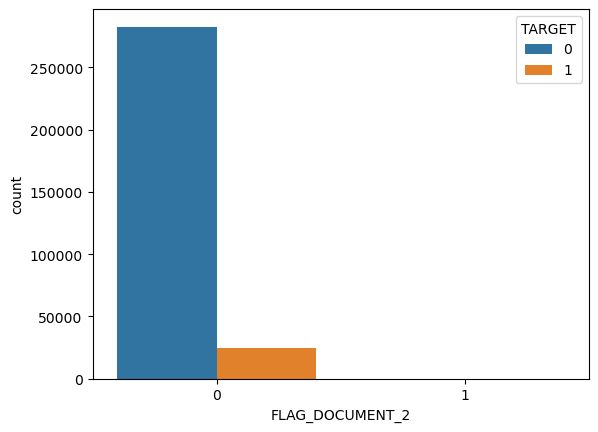

In [532]:
sns.countplot(data=flag_cols_trgt_curr,x='FLAG_DOCUMENT_2', hue='TARGET')

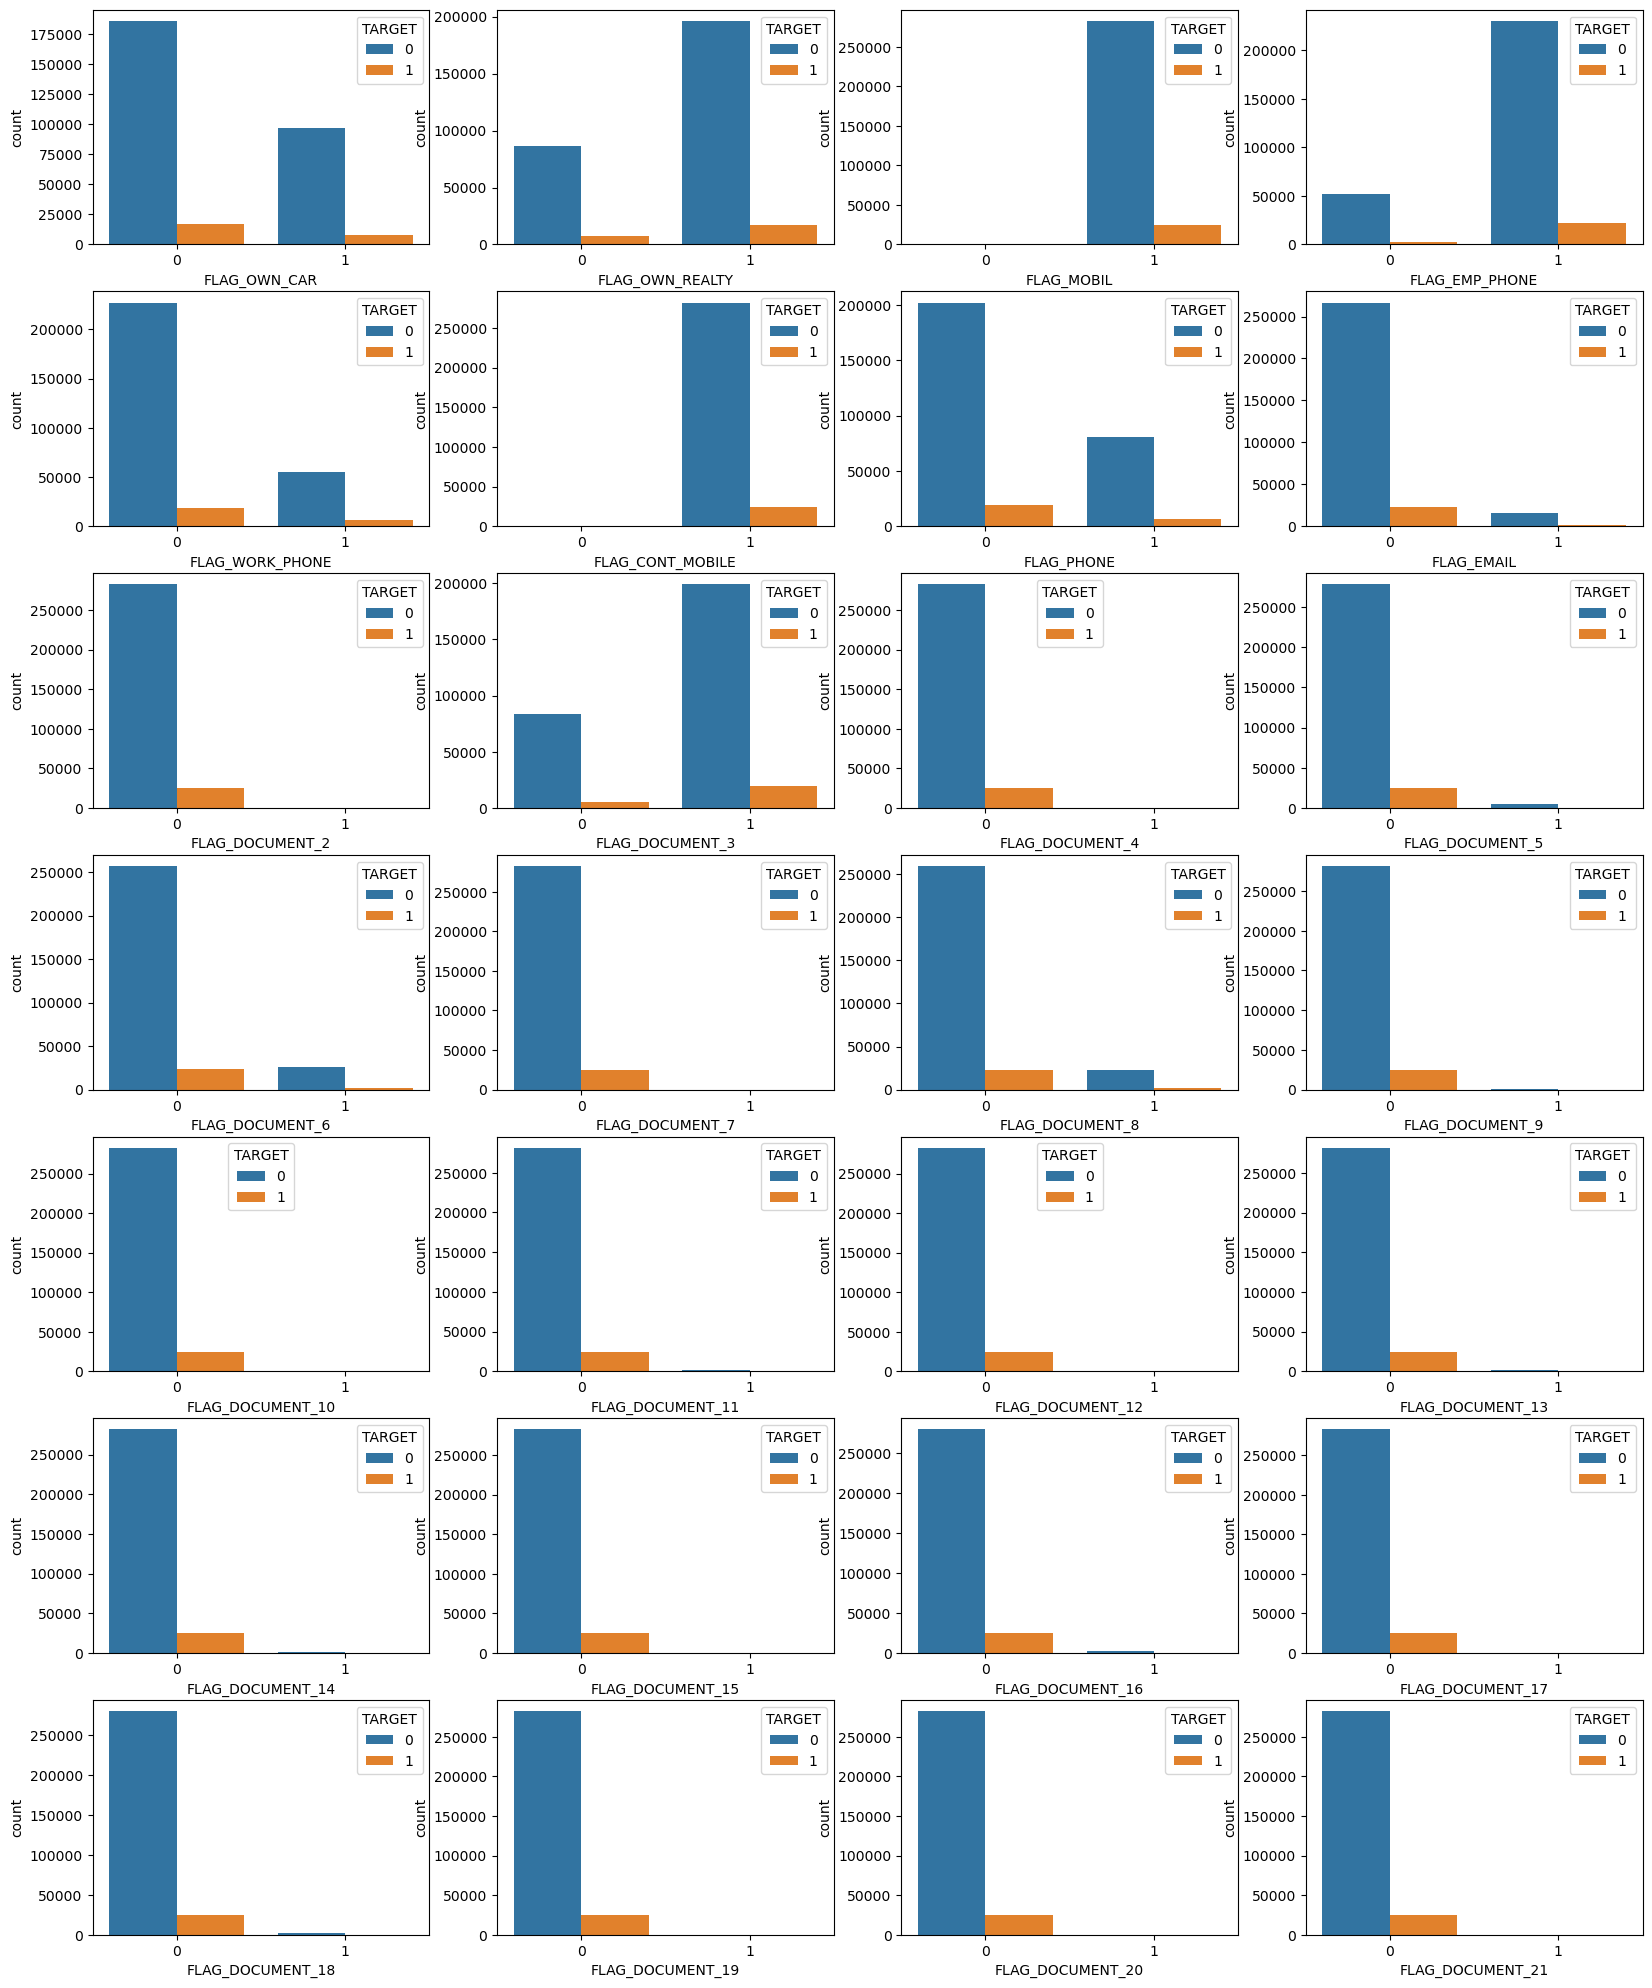

In [533]:
plt.figure(figsize=(20,25))
for i, col in enumerate(flag_cols_curr):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_cols_trgt_curr,x=col,hue='TARGET')

For FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21 (except FLAG_DOCUMENT_3), clients having submitted the document is negligible and majority of those clients doesn't have payment difficulties. For FLAG_DOCUMENT_3, there are quite some clients who have submitted the document, but the ratio between TARGET and those who have submitted vs not submitted seems proportionate. Hence, we can conclude, these FLAG_DOCUMENT_** columns doesn't impact TARGET and it's safe to drop these columns.   

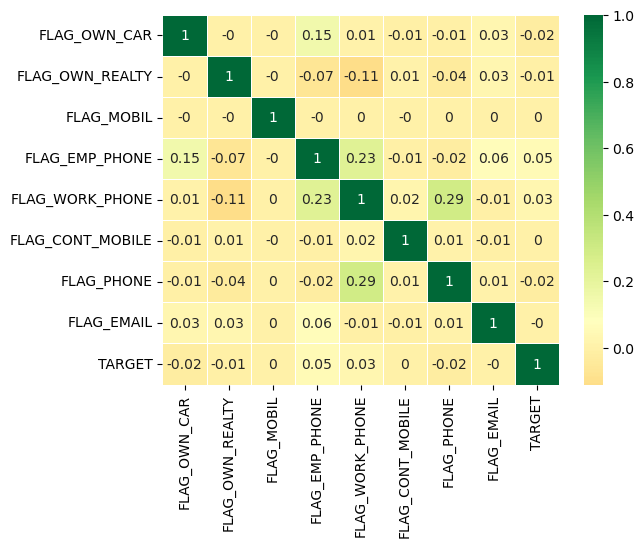

In [534]:
#  Checking corelation between TARGET and other FLAG columns (i.e. excluding the FLAG_DOCUMENT columns) - 
#  'FLAG_OWN_CAR'
#  'FLAG_OWN_REALTY'
#  'FLAG_MOBIL'
#  'FLAG_EMP_PHONE'
#  'FLAG_WORK_PHONE'
#  'FLAG_CONT_MOBILE'
#  'FLAG_PHONE'
#  'FLAG_EMAIL'

flag_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
df_flag_trgt = df_curr_app[flag_corr]
df_flag_corr = round(df_flag_trgt.corr(),2)
sns.heatmap(df_flag_corr, cmap="RdYlGn", annot=True, linewidths=0.5, center=0.08)
plt.show()

There is no strong linear correlationship between any of the above FLAG columns with TARGET. So, we will drop these columns. However, considering the nature of FLAG_OWN_CAR and FLAG_OWN_REALTY, there might have an impact on TARGET which we will investigate further. So, for now dropping all flag columns except FLAG_OWN_CAR and FLAG_OWN_REALTY. 

In [535]:
#Dropping columns not relevant for this analysis

additional_cols_to_drop_curr=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']

df_curr_app.drop(labels=additional_cols_to_drop_curr,axis=1,inplace=True)
df_curr_app.shape

(307511, 47)

In [536]:
df_curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0   

Dropping Additional columns that doesn't seem relevant for analysis

In [537]:
cols_irrelevant = ['DAYS_REGISTRATION','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
cols_irrelevant

['DAYS_REGISTRATION',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [538]:
# Delete the columns which are irrelevant for the analysis
df_curr_app = df_curr_app.drop(cols_irrelevant,axis=1)
df_curr_app.shape

(307511, 34)

 #### Summing all AMT_REQ_CREDIT_BUREAU_**** columns to one column for ease of analysis

In [539]:
# Handling AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR 
# Creating a new columns AMT_REQ_CREDIT_BUREAU_SUM for sumn of all MT_REQ_CREDIT_BUREAU_****
credit_bureau_list = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
df_curr_app['AMT_REQ_CREDIT_BUREAU_SUM']=df_curr_app[credit_bureau_list].sum(axis=1) 


In [540]:
df_curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0        9461            637             2120        Laborers   
1       16765           1188              291      Core staff   
2       19046            225             2531        Laborers   
3       19005           3039             2437        Laborers   
4       19932           3038             3458      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.535276   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.535276   
4                Religion      0.322738      0.535276   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0           

In [541]:
# Dropping these 6 columns - 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR' 
df_curr_app = df_curr_app.drop(labels=credit_bureau_list, axis=1)


In [542]:
df_curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0        9461            637             2120        Laborers   
1       16765           1188              291      Core staff   
2       19046            225             2531        Laborers   
3       19005           3039             2437        Laborers   
4       19932           3038             3458      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.535276   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.535276   
4                Religion      0.322738      0.535276   

   AMT_REQ_CREDIT_BUREAU_SUM  
0                        1.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0

#### Converting DAYS_BIRTH column into AGE column for ease of analysis

In [543]:
# Dividing DAYS_BIRTH by 365 for Age of client
df_curr_app['AGE'] = df_curr_app['DAYS_BIRTH']//365
df_curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0        9461            637             2120        Laborers   
1       16765           1188              291      Core staff   
2       19046            225             2531        Laborers   
3       19005           3039             2437        Laborers   
4       19932           3038             3458      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.535276   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.535276   
4                Religion      0.322738      0.535276   

   AMT_REQ_CREDIT_BUREAU_SUM  AGE  
0                        1.0   25  
1                        0.0   45  
2                        0.0   52  
3                        0.0   52  
4                        0.0   54

In [544]:
# Drop 'DAYS_BIRTH' column
df_curr_app = df_curr_app.drop(['DAYS_BIRTH'],axis=1)
df_curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            637             2120        Laborers              1.0   
1           1188              291      Core staff              2.0   
2            225             2531        Laborers              1.0   
3           3039             2437        Laborers              2.0   
4           3038             3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.535276   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.535276   
4                Religion      0.322738      0.535276   

   AMT_REQ_CREDIT_BUREAU_SUM  AGE  
0                        1.0   25  
1                        0.0   45  
2                        0.0   52  
3                        0.0   52  
4                        0.0   54

#### Converting DAYS_EMPLOYED column into YEARS_EMPLOYED column for ease of analysis

In [545]:
# Dividing DAYS_EMPLOYED by 365 for YEAR_EMPLOYED of client 
df_curr_app['YEARS_EMPLOYED'] = df_curr_app['DAYS_EMPLOYED']//365

# Dropping 'DAYS_EMPLOYED' column
df_curr_app = df_curr_app.drop(['DAYS_EMPLOYED'],axis=1)

In [546]:
df_curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                           0  Business Entity Type 3      0.262949   
1                           0                  School      0.622246   
2                           0              Government      0.555912   
3                           0  Business Entity Type 3      0.650442   
4                           0                Religion      0.322738   

   EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_SUM  AGE  YEARS_EMPLOYED  
0      0.139376                        1.0   25               1  
1      0.535276                        0.0   45               3  
2      0.729567                        0.0   52               0  
3      0.535276                        0.0   52               8  
4      0.535276                        0.0   54               8

### Outliers detection and treatment

In [547]:
# Reviewing columns left in the clean dataframe after dropping varioys columns
df_curr_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  int32  
 5   FLAG_OWN_REALTY              307511 non-null  int32  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [548]:
# Identifing number of numeric fields to plot boxplot for checking outliers
numerical_col = df_curr_app.select_dtypes(include='number').columns
len(numerical_col)

21

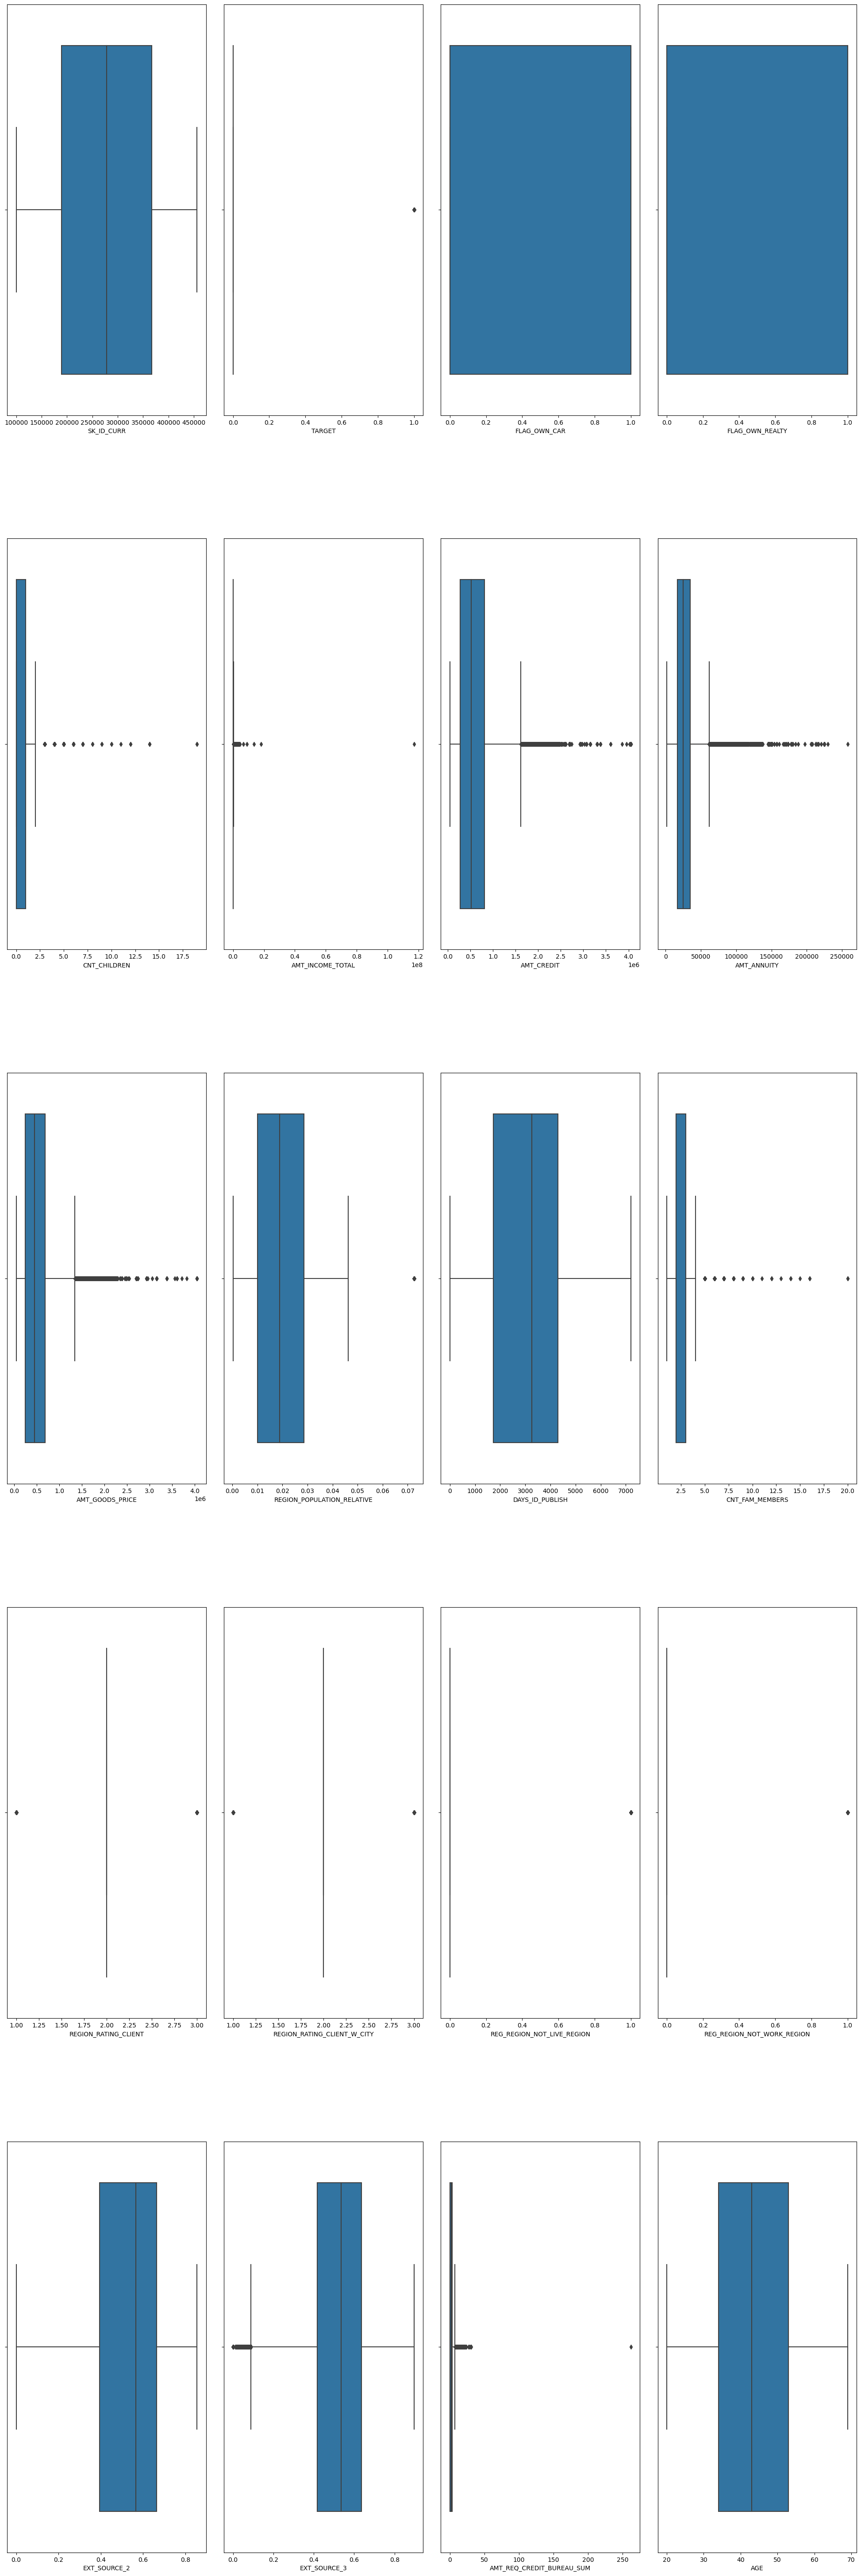

In [549]:
# Plotting barplot for each of the numeric columns
fig , axes = plt.subplots(nrows=5, ncols=4, constrained_layout=True)                 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)
for ax, column in zip(axes.flatten(),numerical_col):         
    sns.boxplot(df_curr_app[column],ax=ax) 

In [550]:
# Identifying outliers in all the numerical columns using IQR rule and removing the outlier records 
outliers_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for col in outliers_list: 
    q1 = df_curr_app[col].quantile(0.25)
    q3 = df_curr_app[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_curr_app = df_curr_app.loc[(df_curr_app[col] > range_low) & (df_curr_app[col] < range_high)]

df_curr_app.shape

(276492, 29)

In [551]:
# Percentage of records lost in removing outliers: 10%
round((307511 - df_curr_app.shape[0])/307511 * 100,2)

10.09

#### Binning of AGE,  AMT_INCOME_TOTAL, AMT_CREDIT and EXT_SOURCE_SCORE columns

#### Binning Age into 4 groups - Very_Young, Young, Mid_Age and Senior_Citizen

In [552]:
df_curr_app['AGE'].describe()

count    276492.000000
mean         43.427926
std          12.118473
min          20.000000
25%          33.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [553]:
# Creating column AGE_GROUP with AGE - 'Very_Young','Young', 'Middle_Age', 'Senior_Citizen'
df_curr_app['AGE_GROUP']=pd.cut(df_curr_app['AGE'],bins=[19,25,35,60,130], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])  
df_curr_app[['AGE','AGE_GROUP']].head()

AGE   AGE_GROUP
0   25  Very_Young
1   45  Middle_Age
2   52  Middle_Age
3   52  Middle_Age
4   54  Middle_Age

#### Binning AMT_CREDIT into 5 groups - 'VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'

In [554]:
round(df_curr_app['AMT_CREDIT'].describe(),2)

count     276492.00
mean      529775.92
std       318141.90
min        45000.00
25%       269550.00
50%       472500.00
75%       752742.00
max      1558813.50
Name: AMT_CREDIT, dtype: float64

In [555]:
# Creating column CREDIT_GROUP with AMT_CREDIT - 'VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'
df_curr_app['CREDIT_GROUP'] = pd.qcut(df_curr_app.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df_curr_app[['AMT_CREDIT', 'CREDIT_GROUP']].head(15)

AMT_CREDIT CREDIT_GROUP
0     406597.5          LOW
1    1293502.5    VERY_HIGH
2     135000.0     VERY_LOW
3     312682.5          LOW
4     513000.0       MEDIUM
5     490495.5       MEDIUM
8    1019610.0         HIGH
9     405000.0          LOW
10    652500.0       MEDIUM
11    148365.0     VERY_LOW
12     80865.0     VERY_LOW
13    918468.0         HIGH
14    773680.5       MEDIUM
15    299772.0          LOW
16    509602.5       MEDIUM

#### Binning AMT_INCOME_TOTAL into 5 groups - 'VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'

In [556]:
df_curr_app['AMT_INCOME_TOTAL'].describe()

count    276492.000000
mean     149830.663305
std       61031.345007
min       25650.000000
25%      112276.125000
50%      135000.000000
75%      180000.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [557]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL - 'VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'
df_curr_app['INCOME_GROUP'] = pd.qcut(df_curr_app.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) 
df_curr_app[['AMT_INCOME_TOTAL','INCOME_GROUP']].head(15)

AMT_INCOME_TOTAL INCOME_GROUP
0         202500.000       MEDIUM
1         270000.000         HIGH
2          67500.000     VERY_LOW
3         135000.000          LOW
4         121500.000          LOW
5          99000.000          LOW
8         112500.000          LOW
9         135000.000          LOW
10        112500.000          LOW
11         38419.155     VERY_LOW
12         67500.000     VERY_LOW
13        225000.000         HIGH
14        189000.000       MEDIUM
15        157500.000       MEDIUM
16        108000.000          LOW

For ease of analysis, creating new column EXT_SOURCE_SCORE with average of EXT_SOURCE_2 and EXT_SOURCE_3

In [558]:
df_curr_app['EXT_SOURCE_SCORE'] = round(((df_curr_app['EXT_SOURCE_2'] + df_curr_app['EXT_SOURCE_3'])/2),2)
df_curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                           0  Business Entity Type 3      0.262949   
1                           0                  School      0.622246   
2                           0              Government      0.555912   
3                           0  Business Entity Type 3      0.650442   
4                           0                Religion      0.322738   

   EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_SUM  AGE  YEARS_EMPLOYED   AGE_GROUP  \
0      0.139376                        1.0   25               1  Very_Young   
1      0.535276                        0.0   45               3  Middle_Age   
2      0.729567                        0.0   52               0  Middle_Age   
3      0.535276                        0.0   52               8  Middle_Age   
4      0.535276                        0.0   54               8  Middle_Age   

  CREDIT_GROUP INCOME_GROUP  EXT_SOURCE_SCORE  
0          LOW       MEDIUM              0.20  
1    VERY_HIGH         HIGH              0.58  
2     VERY_LOW     VERY_LOW              0.64  
3          LOW          LOW              0.59  
4       MEDIUM          LOW              0.43

In [559]:
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
df_curr_app.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)
df_curr_app.shape

(276492, 31)

#### Binning EXT_SOURCE_SCORE into 3 groups - 'LOW', "MEDIUM", 'HIGH'

In [560]:
df_curr_app['EXT_SOURCE_SCORE'].describe()

count    276492.000000
mean          0.511092
std           0.135813
min           0.000000
25%           0.420000
50%           0.530000
75%           0.610000
max           0.840000
Name: EXT_SOURCE_SCORE, dtype: float64

In [561]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
df_curr_app['EXT_SCORE_CATEGORY'] = pd.qcut(df_curr_app.EXT_SOURCE_SCORE, q=[0, 0.25, 0.75, 1], labels=['LOW', 'MEDIUM', 'HIGH']) 
df_curr_app[['EXT_SOURCE_SCORE','EXT_SCORE_CATEGORY']].head(15)

EXT_SOURCE_SCORE EXT_SCORE_CATEGORY
0               0.20                LOW
1               0.58             MEDIUM
2               0.64               HIGH
3               0.59             MEDIUM
4               0.43             MEDIUM
5               0.49             MEDIUM
8               0.48             MEDIUM
9               0.64               HIGH
10              0.51             MEDIUM
11              0.60             MEDIUM
12              0.45             MEDIUM
13              0.67               HIGH
14              0.59             MEDIUM
15              0.51             MEDIUM
16              0.15                LOW

### Data Imbalance

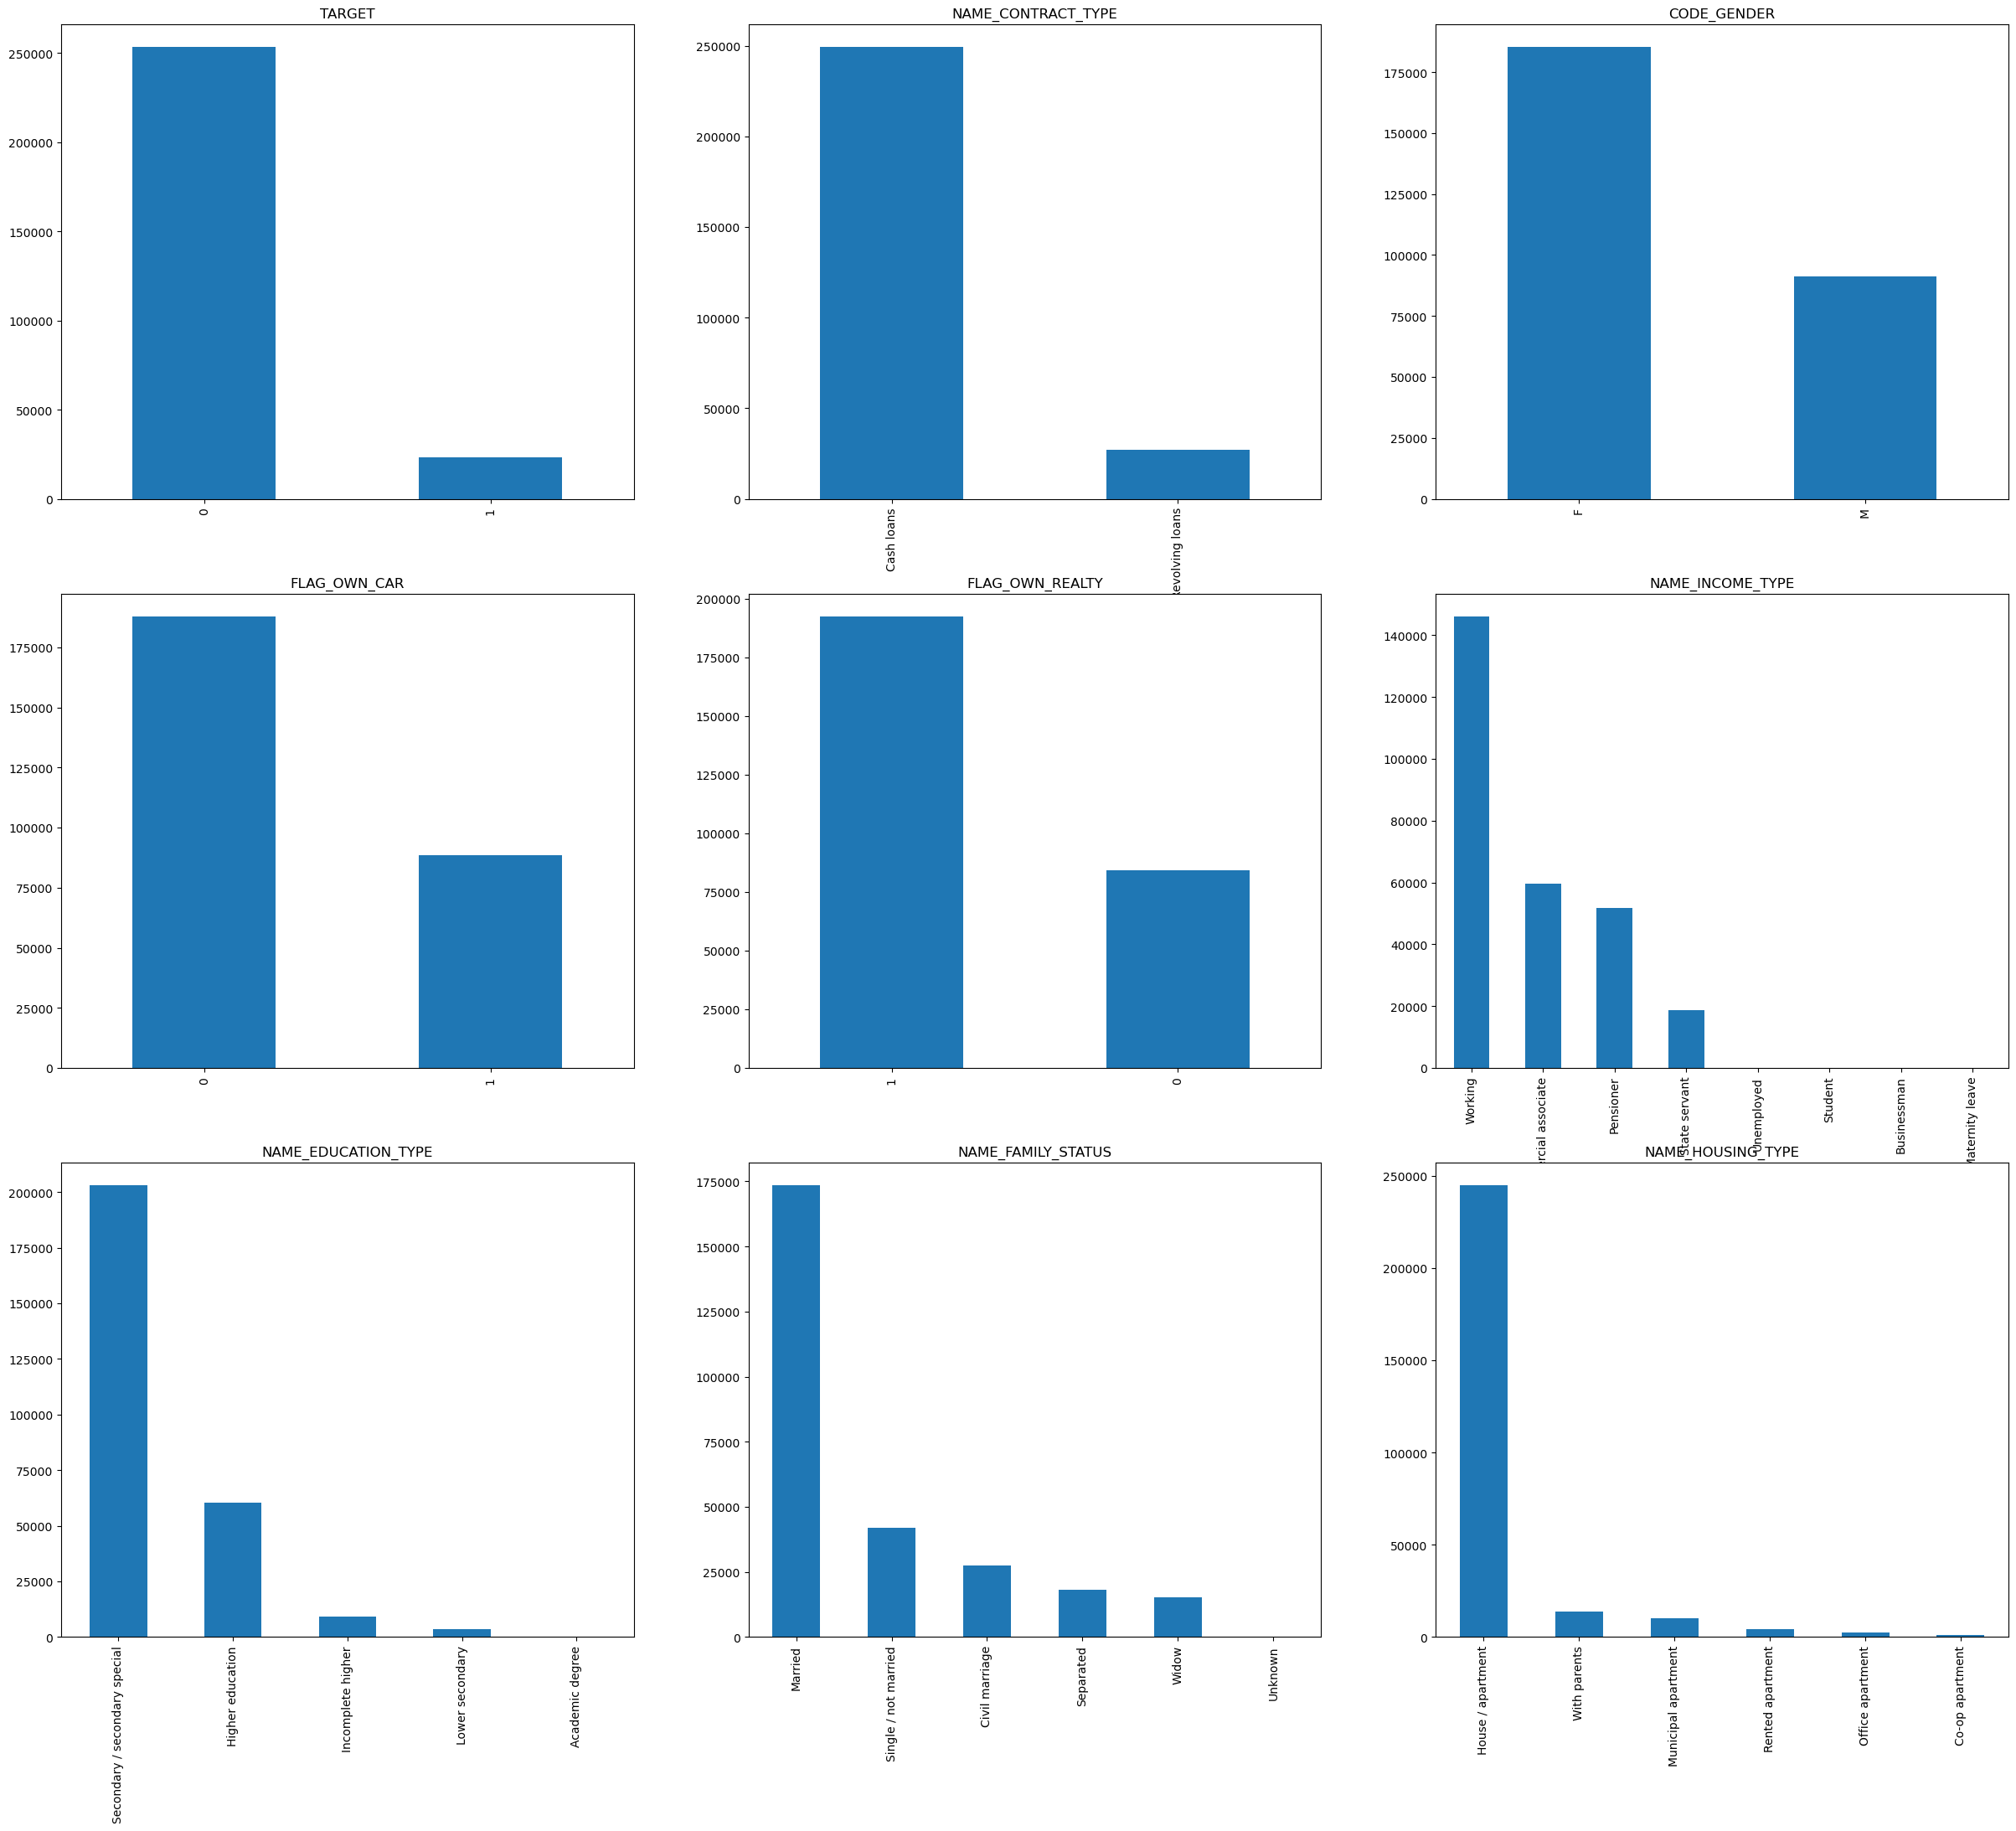

In [562]:
# Listing categorical columns for checking data imbalance and plotting them
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
i=0
plt.figure(figsize=(30,25))
for col in col_list:    
    i=i+1
    plt.subplot(3, 3,i)    
    df_curr_app[col].value_counts().plot(kind='bar');
    plt.title(col)

Observations on data imbalance in the categorical columns:-

- TARGET - Extremely few clients are defaulters(1) as compared to non defaulters(0)
- NAME_CONTRACT_TYPE - Few cients have Revolving loans as compared to Cash loans
- NAME_INCOME_TYPE - Unemployed, Student, Businessman and Maternity Leave clients are zero
- NAME_EDUCATION_TYPE - Most of the loans applied by Secondary/Secondary special educated people
- NAME_FAMILY_STATUS - Most of the loans are applied by Married clients
- NAME_HOUSING_TYPE - Most of the clients live in Home/appartment

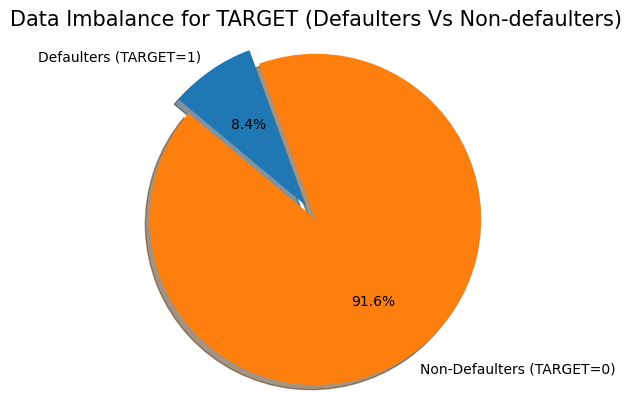

In [563]:
# Viewing distribution of the target variable using a pie chart.

count1 = 0 
count0 = 0
for i in df_curr_app['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df_curr_app['TARGET']))*100
count0 = (count0/len(df_curr_app['TARGET']))*100

x = ['Defaulters (TARGET=1)','Non-Defaulters (TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data Imbalance for TARGET (Defaulters Vs Non-defaulters)',fontsize=15)
plt.show()

#### Dividing current application dataframe into two dataframes so that we can separately analyse them (due to very high data imbalance for TARGET)
##### Client with payment difficulties (Target=1) 
##### All other cases (Target=0) 

In [564]:
# Client with payment difficulties (Target=1)
df_curr_app_target_1 = df_curr_app[df_curr_app['TARGET'] == 1]
df_curr_app_target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
81      100096       1         Cash loans           F             0   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 1             0          202500.0    406597.5      24700.5   
26                1             0          112500.0    979992.0      27076.5   
40                1             0          202500.0   1193580.0      35028.0   
42                0             0          135000.0    288873.0      16258.5   
81                1             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0               Working  Secondary / secondary special   
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
81         252000.0             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0              2120        Laborers              1.0                     2   
26             1827   Cooking staff              1.0                     3   
40             1029        Laborers              2.0                     2   
42             4409     Sales staff              2.0                     3   
81             4199         Unknown              2.0                     2   

    REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                             2                           0   
26                            2                           0   
40                            2                           0   
42                            3                           0   
81                            2                           0   

    REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  \
0                            0  Business Entity Type 3   
26                           0  Business Entity Type 3   
40                           0  Business Entity Type 3   
42                           0           Self-employed   
81                           0                 Unknown   

    AMT_REQ_CREDIT_BUREAU_SUM  AGE  YEARS_EMPLOYED       AGE_GROUP  \
0                         1.0   25               1      Very_Young   
26                        4.0   51               7      Middle_Age   
40                        6.0   47               3      Middle_Age   
42                        2.0   36               9      Middle_Age   
81                        0.0   67            1000  Senior_Citizen   

   CREDIT_GROUP INCOME_GROUP  EXT_SOURCE_SCORE EXT_SCORE_CATEGORY  
0           LOW       MEDIUM              0.20                LOW  
26         HIGH          LOW              0.37                LOW  
40    VERY_HIGH       MEDIUM              0.31                LOW  
42          LOW          LOW              0.54             MEDIUM  
81          LOW     VERY_LOW              0.37                LOW

In [565]:
# Client with all other cases (Target=0)
df_curr_app_target_0 = df_curr_app[df_curr_app['TARGET'] == 0]
df_curr_app_target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   
5                1             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   
5         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   
5              477        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   
5                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  \
1                           0                  School   
2                           0              Government   
3                           0  Business Entity Type 3   
4                           0                Religion   
5                           0                   Other   

   AMT_REQ_CREDIT_BUREAU_SUM  AGE  YEARS_EMPLOYED   AGE_GROUP CREDIT_GROUP  \
1                        0.0   45               3  Middle_Age    VERY_HIGH   
2                        0.0   52               0  Middle_Age     VERY_LOW   
3                        0.0   52               8  Middle_Age          LOW   
4                        0.0   54               8  Middle_Age       MEDIUM   
5                        2.0   46               4  Middle_Age       MEDIUM   

  INCOME_GROUP  EXT_SOURCE_SCORE EXT_SCORE_CATEGORY  
1         HIGH              0.58             MEDIUM  
2     VERY_LOW              0.64               HIGH  
3          LOW              0.59             MEDIUM  
4          LOW              0.43             MEDIUM  
5          LOW              0.49             MEDIUM

In [566]:
df_curr_app_target_1.shape

(23150, 32)

In [567]:
df_curr_app_target_0.shape

(253342, 32)

#### Data Imbalance Ratio for TARGET

In [568]:
# Calculating data imbalance ratio for TARGET column (Target0/Target1)
round(df_curr_app_target_0.shape[0]/df_curr_app_target_1.shape[0],2)

10.94

## Univariate Analysis

### Univariate analysis for Unordered categorical variables

#### Defaulters and Non-defaulters with respect to Gender

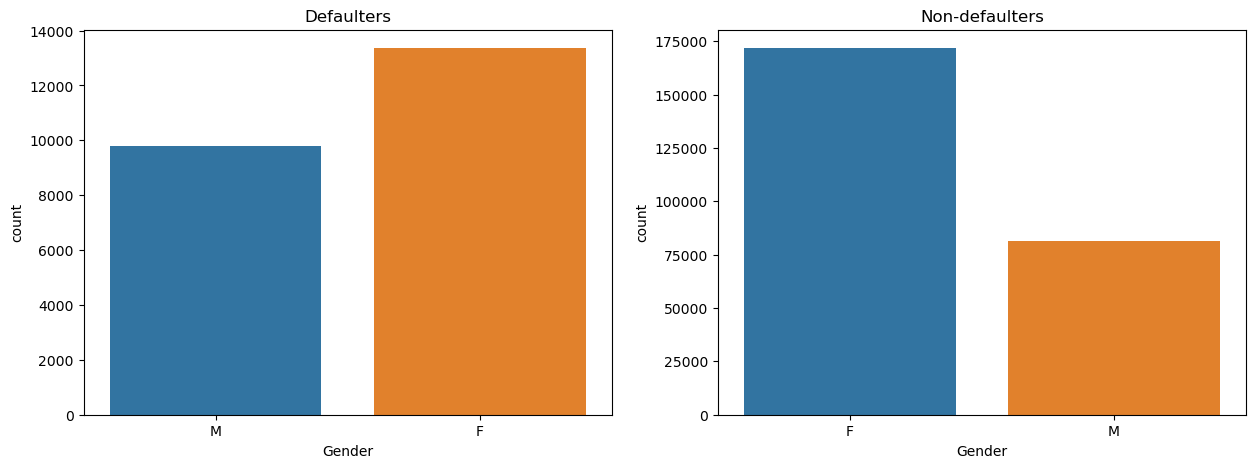

In [569]:
# Plotting two countplots for defaulters and non defaulters wrt gender
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_curr_app_target_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_curr_app_target_0)
plt.title('Non-defaulters')
ax.set(xlabel='Gender')
plt.show()

##### Insights or Observations:
1. Defaluters - Count of female clients are more in number of defaulters than male.
2. Non-defaluters - The same pattern is observed for non-defaluters as well. Count of females are more than male.

#### Defaulters and Non-defaulters with respect to Contract Type

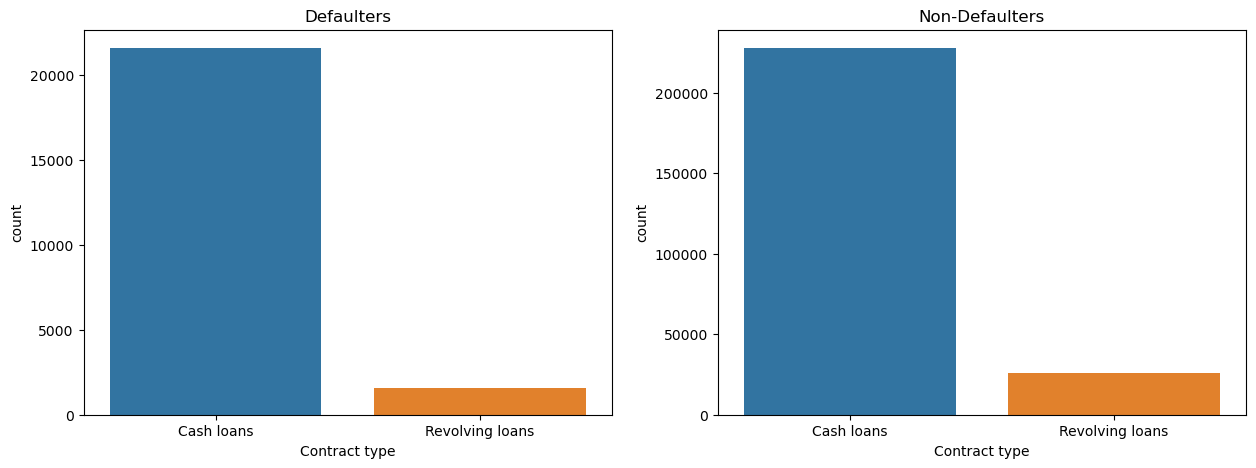

In [570]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_curr_app_target_1)
plt.title('Defaulters')
ax.set(xlabel='Contract type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_curr_app_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Contract type')
plt.show()

##### Insights or Observations:
1. There are 2 types of contact type in the available data. 
2. Cash loans are very high in number as compared to Revolving loans.

#### Defaulters and Non-defaulters with respect to Income Type:

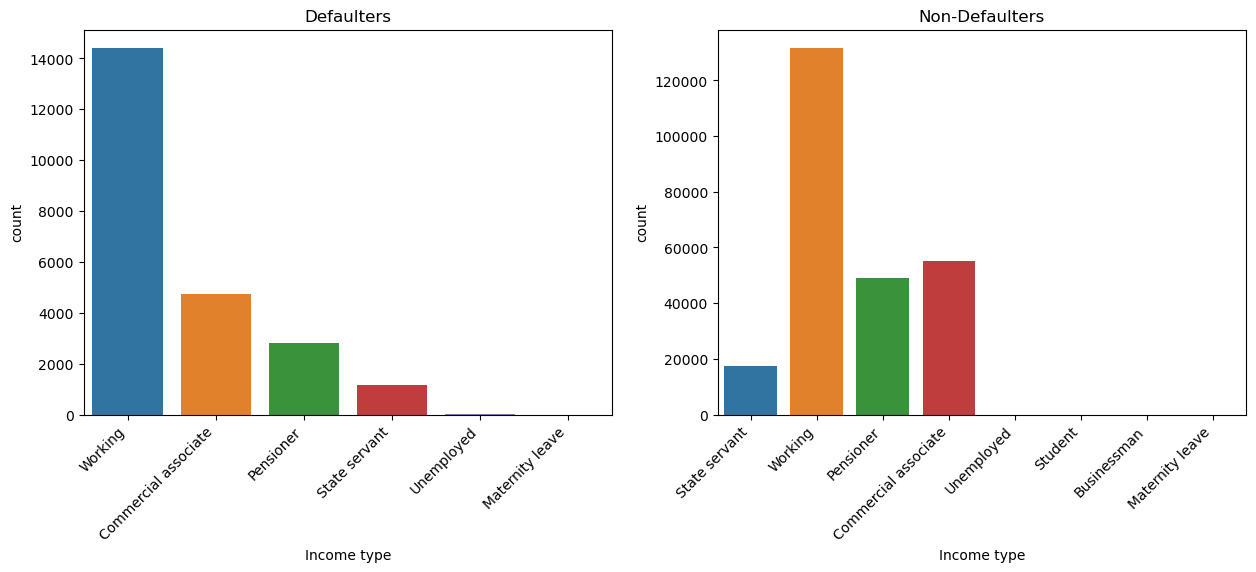

In [571]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_curr_app_target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_curr_app_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Insights or Observations:
1. Defaulters - Working class clients are mostly defaulted as their count is high as compared to other professions.
2. Non-defaulters - Same pattern, working class clients are high in number who are not defaulters.

#### Defaulters and Non-defaulters  with respect to Education Type:

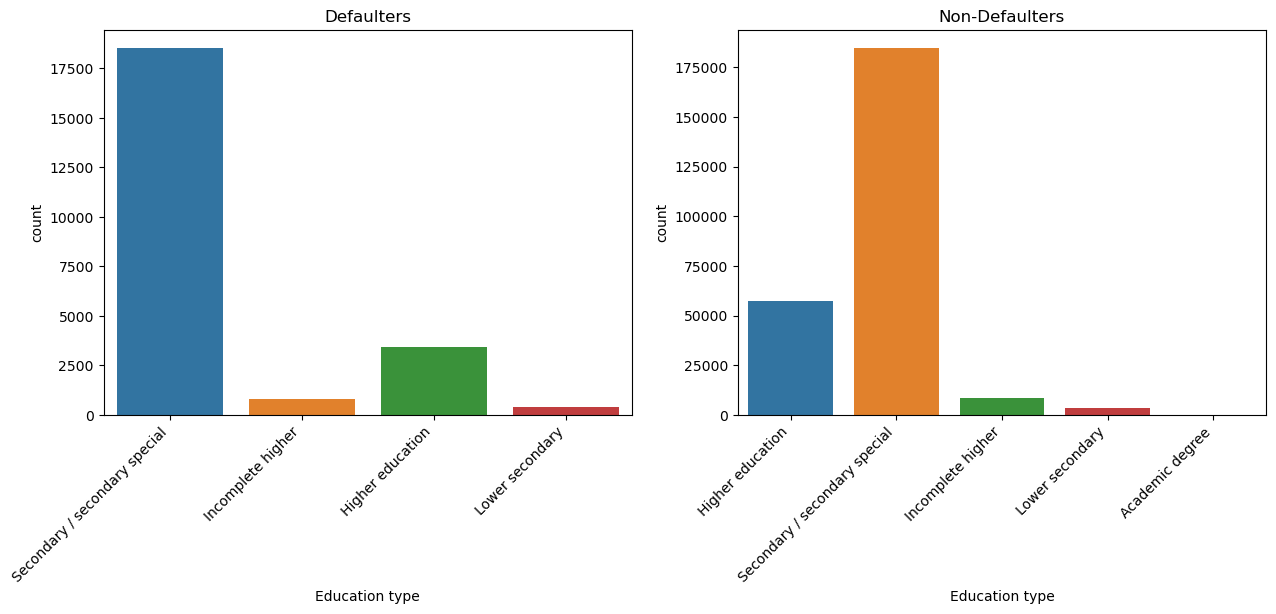

In [572]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_curr_app_target_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_curr_app_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Insights or Observations:
1. Defaulters - Education with Secondary/Secondary special clients are more number in defaulters as compared to other level of education.
2. Non defaulters - Secondary/Secondary special clients are more in numbers in defaulter category as well.

#### Defaulters and Non-defaulters with respect to Family Status:

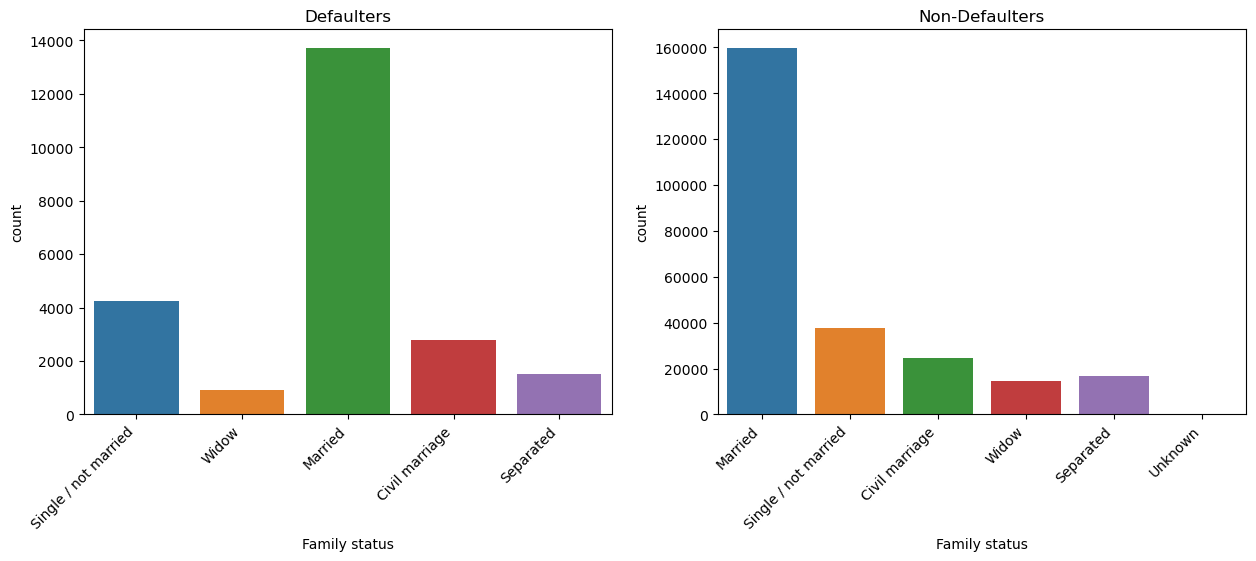

In [573]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_curr_app_target_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_curr_app_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Insights or Observations:
Clients with "Married" marital status are high in numbers in both defaulter and non-defaulter category as compared to other marital status - single, separated, widow and civil partnership.

### Univariate analysis for continious numerical variables

#### Defaulters and Non-defaulters with respect to Credit Amount:

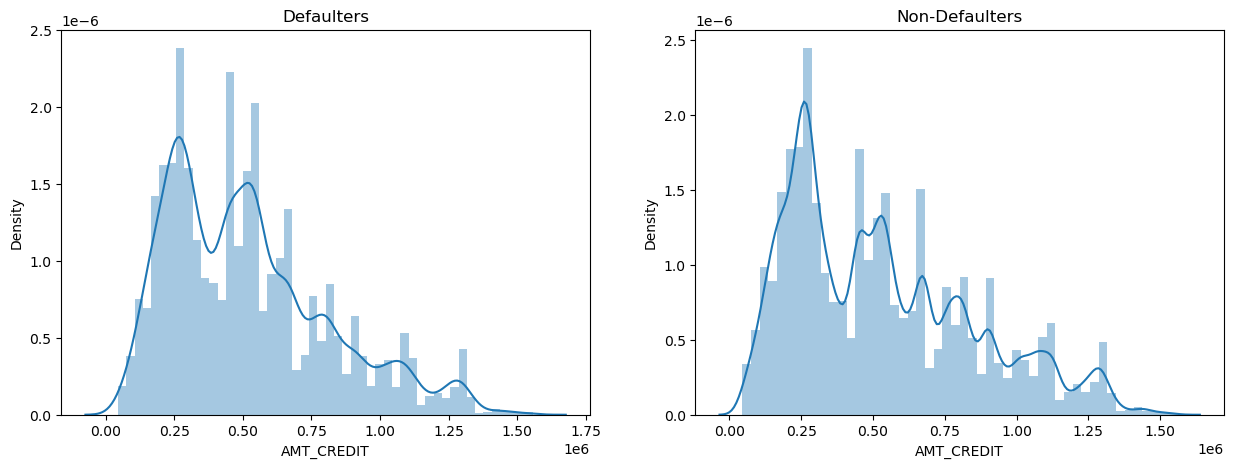

In [574]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_curr_app_target_1['AMT_CREDIT'])

plt.subplot(1,2,2) 
plt.title('Non-Defaulters')
sns.distplot(df_curr_app_target_0['AMT_CREDIT'])
plt.show()

##### Insights or Observations:
1. Defaulters - Defaults increase up credit amount 500000 ad decreases beyond that.
2. Non defaulters - In the non defaulter category, there is more distribution upto credit amount 750000.

#### Defaulters and Non-defaulters with respect to Annuity Amount:

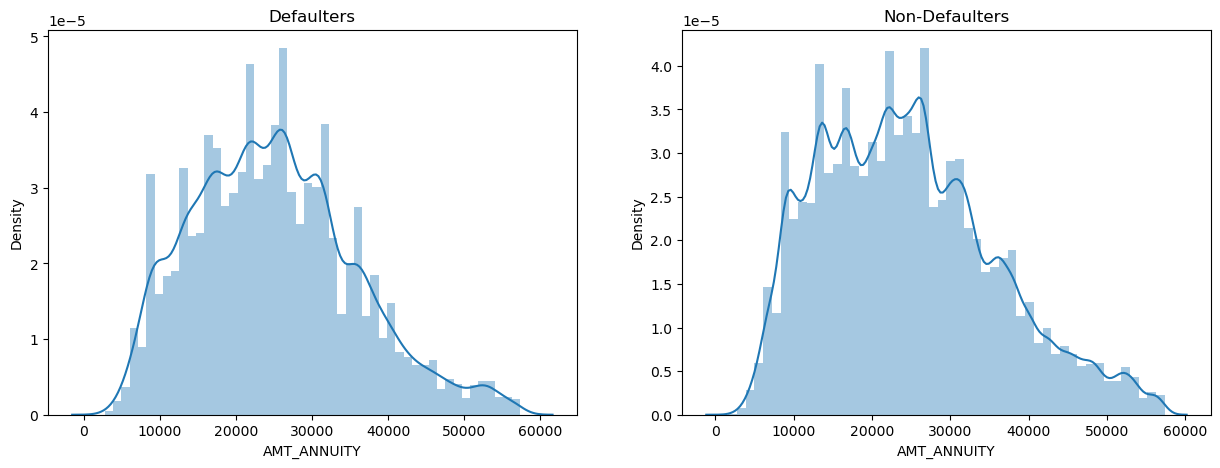

In [575]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_curr_app_target_1['AMT_ANNUITY'])

plt.subplot(1,2,2) 
plt.title('Non-Defaulters')
sns.distplot(df_curr_app_target_0['AMT_ANNUITY'])
plt.show()

##### Insights or Observations:
Annuity amount distribution is concentrated between 10000 to 40000 for both categories - Defaulters and Non defaulters.

#### Defaulters and Non-defaulters with respect to Goods Price Amount:

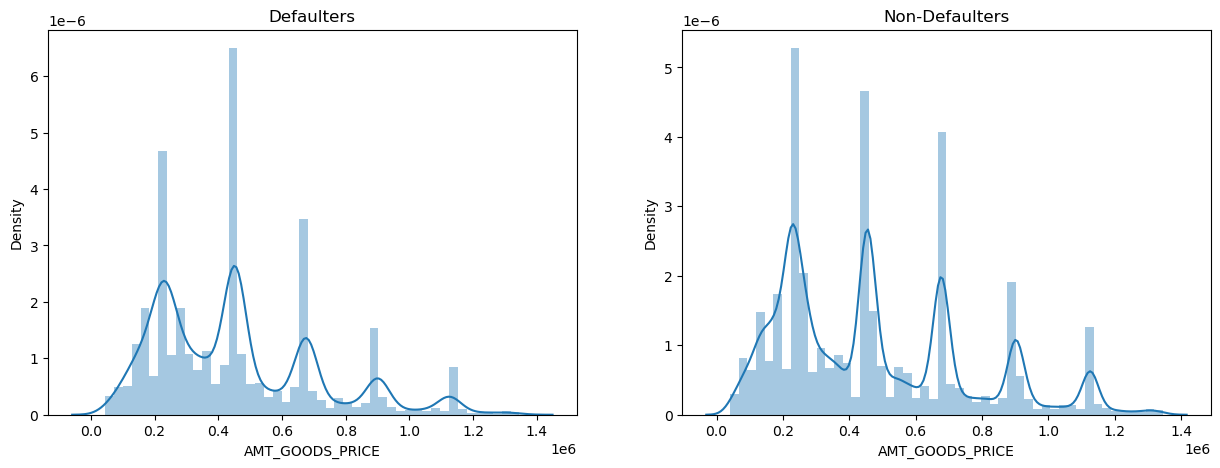

In [576]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_curr_app_target_1['AMT_GOODS_PRICE'])

plt.subplot(1,2,2) 
plt.title('Non-Defaulters')
sns.distplot(df_curr_app_target_0['AMT_GOODS_PRICE'])
plt.show()

##### Insights or Observations:
Goods price amount distribution is concentrated between 200000 and 800000 for both defaulters and non-defaulters category. 

### Segmented Univariate analysis for ordered categorical variables

#### Percentage of clients defaulted and not defaulted in each Age Groups ('Very_Young','Young', 'Middle_Age', 'Senior_Citizen')

In [577]:
# Percentage of each age group who were defaulted.
very_young_1 = round(100*len(df_curr_app[(df_curr_app['AGE_GROUP'] == 'Very_Young') & (df_curr_app['TARGET'] == 1)])/len(df_curr_app[df_curr_app['AGE_GROUP'] == 'Very_Young']),2)
young_1 = round(100*len(df_curr_app[(df_curr_app['AGE_GROUP'] == 'Young') & (df_curr_app['TARGET'] == 1)])/len(df_curr_app[df_curr_app['AGE_GROUP'] == 'Young']),2)
middle_age_1 = round(100*len(df_curr_app[(df_curr_app['AGE_GROUP'] == 'Middle_Age') & (df_curr_app['TARGET'] == 1)])/len(df_curr_app[df_curr_app['AGE_GROUP'] == 'Middle_Age']),2)
senior_citizen_1 = round(100*len(df_curr_app[(df_curr_app['AGE_GROUP'] == 'Senior_Citizen') & (df_curr_app['TARGET'] == 1)])/len(df_curr_app[df_curr_app['AGE_GROUP'] == 'Senior_Citizen']),2)

In [578]:
# Creating a dataframe of the defaulted age group percentage
agegroup_default = {'AGE_GROUP':['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'], 'Percentage':[very_young_1,young_1, middle_age_1, senior_citizen_1]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

AGE_GROUP  Percentage
0      Very_Young       11.89
1           Young       10.98
2      Middle_Age        7.52
3  Senior_Citizen        4.97

In [579]:
# Percentage of each age group who were not defaulted.
very_young_0 = round(100*len(df_curr_app[(df_curr_app['AGE_GROUP'] == 'Very_Young') & (df_curr_app['TARGET'] == 0)])/len(df_curr_app[df_curr_app['AGE_GROUP'] == 'Very_Young']),2)
young_0 = round(100*len(df_curr_app[(df_curr_app['AGE_GROUP'] == 'Young') & (df_curr_app['TARGET'] == 0)])/len(df_curr_app[df_curr_app['AGE_GROUP'] == 'Young']),2)
middle_age_0 = round(100*len(df_curr_app[(df_curr_app['AGE_GROUP'] == 'Middle_Age') & (df_curr_app['TARGET'] == 0)])/len(df_curr_app[df_curr_app['AGE_GROUP'] == 'Middle_Age']),2)
senior_citizen_0 = round(100*len(df_curr_app[(df_curr_app['AGE_GROUP'] == 'Senior_Citizen') & (df_curr_app['TARGET'] == 0)])/len(df_curr_app[df_curr_app['AGE_GROUP'] == 'Senior_Citizen']),2)

In [580]:
# Creating a dataframe of the non defaulted age group percentage
agegroup_nondefault = {'AGE_GROUP':['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'], 'Percentage':[very_young_0,young_0, middle_age_0, senior_citizen_0]} 
df_agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
df_agegroup_nondefault

AGE_GROUP  Percentage
0      Very_Young       88.11
1           Young       89.02
2      Middle_Age       92.48
3  Senior_Citizen       95.03

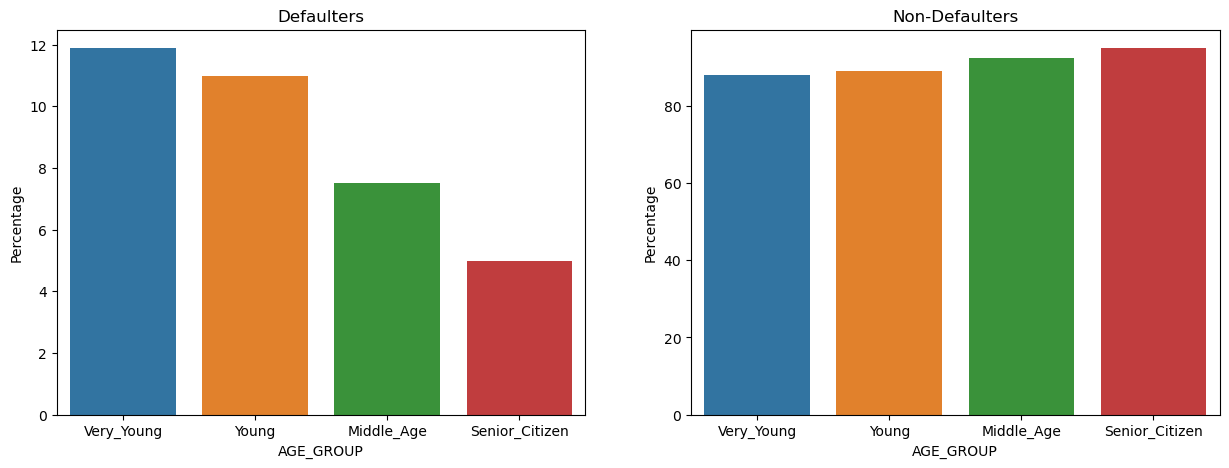

In [581]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_default)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_nondefault)
plt.title('Non-Defaulters')
plt.show()

##### Insights or Observations:
1. Defaulters - Very Young and Young clients are more likely to default than other two age groups. Senior citizens are least likely to default than others.
2. Non defaulter - There is not much difference in the likelihood for non defaulters in the age groups. However, Senior citizens are have highest percentage of non default.

#### Defaulters and Non defaulters with respect to Credit Amount group:

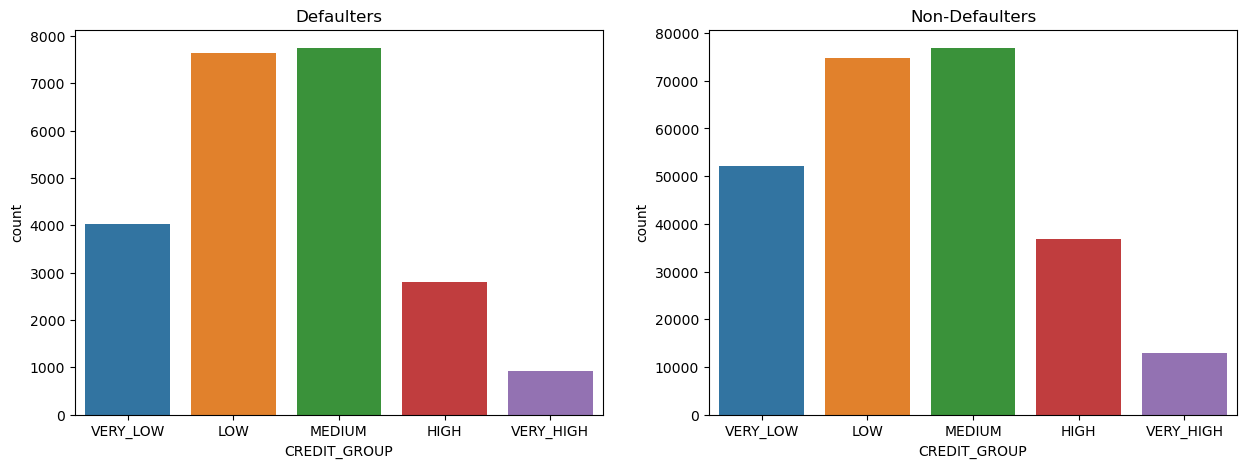

In [582]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_curr_app_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_curr_app_target_0)
plt.title('Non-Defaulters')
plt.show()

##### Insights or Observations:
1. Defaulters - Defaults are high in the low and medium credit groups.
2. Non defaulters - Non-Defaults are also high in the low and medium credit groups.
It seems majority of the clients belong to the low and medium credit groups.

#### Defaulters and Non defaulters with respect to Income group:

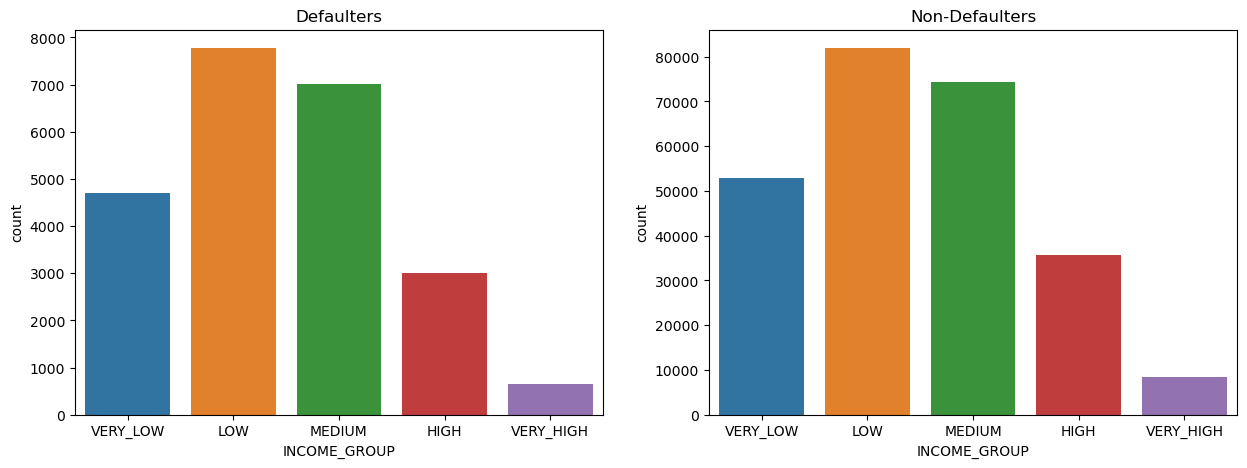

In [583]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=df_curr_app_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=df_curr_app_target_0)
plt.title('Non-Defaulters')
plt.show()

##### Insights or Observations:
1. Defaulters - Defaults are high in the low and medium income groups.
2. Non defaulters - Non-Defaults are also high in the low and medium income groups.
It seems majority of the clients belong to the low and medium income groups.

#### Defaulters and Non defaulters with respect to External Score groups:

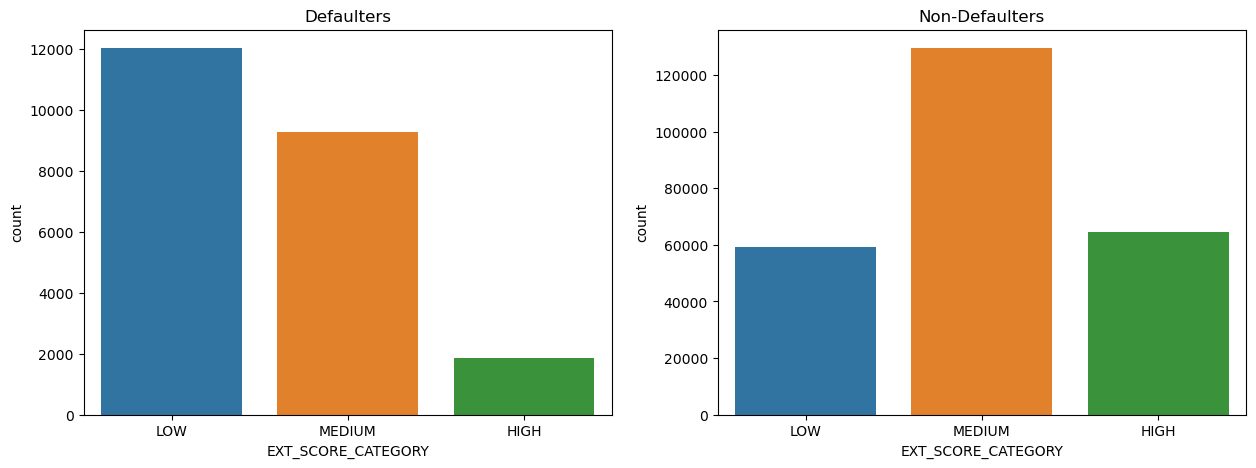

In [584]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_curr_app_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_curr_app_target_0)
plt.title('Non-Defaulters')
plt.show()

##### Insights or Observations:
1. Defaulters - Low and Medium External Score groups are likely to default.
2. Non defaulters - Medium score group has highest number of clients in non defaulters.

## Bivariate Analysis

#### Corelation of relevant numerical columns for defaulters and non defaulters

In [585]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']
corr_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AGE',
 'EXT_SOURCE_SCORE',
 'REGION_RATING_CLIENT']

##### Corelation of defaulters 

In [586]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_curr_app_target_1[corr_cols]
df_corr_target_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
0           202500.0    406597.5      24700.5         351000.0   25   
26          112500.0    979992.0      27076.5         702000.0   51   
40          202500.0   1193580.0      35028.0         855000.0   47   
42          135000.0    288873.0      16258.5         238500.0   36   
81           81000.0    252000.0      14593.5         252000.0   67   

    EXT_SOURCE_SCORE  REGION_RATING_CLIENT  
0               0.20                     2  
26              0.37                     3  
40              0.31                     2  
42              0.54                     3  
81              0.37                     2

In [587]:
# Corelation matrix
df_corr_target_1.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL              1.000000    0.301106     0.380668   
AMT_CREDIT                    0.301106    1.000000     0.744166   
AMT_ANNUITY                   0.380668    0.744166     1.000000   
AMT_GOODS_PRICE               0.300813    0.977850     0.740819   
AGE                          -0.017563    0.134219     0.002726   
EXT_SOURCE_SCORE              0.028578    0.097316     0.077907   
REGION_RATING_CLIENT         -0.141711   -0.037344    -0.043287   

                      AMT_GOODS_PRICE       AGE  EXT_SOURCE_SCORE  \
AMT_INCOME_TOTAL             0.300813 -0.017563          0.028578   
AMT_CREDIT                   0.977850  0.134219          0.097316   
AMT_ANNUITY                  0.740819  0.002726          0.077907   
AMT_GOODS_PRICE              1.000000  0.135451          0.106140   
AGE                          0.135451  1.000000          0.164738   
EXT_SOURCE_SCORE             0.106140  0.164738          1.000000   
REGION_RATING_CLIENT        -0.045917 -0.035560         -0.167028   

                      REGION_RATING_CLIENT  
AMT_INCOME_TOTAL                 -0.141711  
AMT_CREDIT                       -0.037344  
AMT_ANNUITY                      -0.043287  
AMT_GOODS_PRICE                  -0.045917  
AGE                              -0.035560  
EXT_SOURCE_SCORE                 -0.167028  
REGION_RATING_CLIENT              1.000000

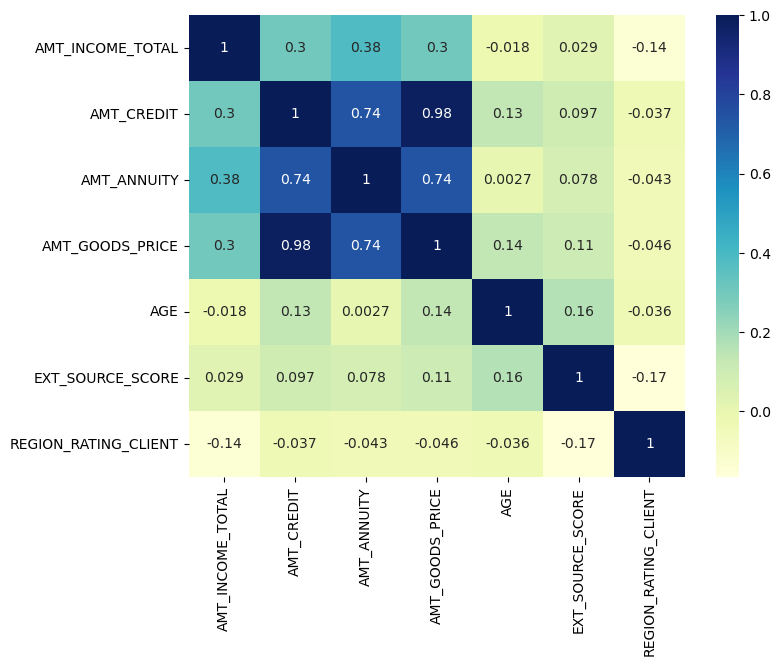

In [588]:
# Plotting heatmap for above corelation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_corr_target_1.corr(),cmap="YlGnBu",annot=True)
plt.show()

#### Insights/Observations:
**Highly corelated columns for defaulters**
1. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
2. AMT_CREDIT and AMT_ANNUITY (0.74)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

##### Corelation of non defaulters 

In [590]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_curr_app_target_0[corr_cols]
df_corr_target_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
1          270000.0   1293502.5      35698.5        1129500.0   45   
2           67500.0    135000.0       6750.0         135000.0   52   
3          135000.0    312682.5      29686.5         297000.0   52   
4          121500.0    513000.0      21865.5         513000.0   54   
5           99000.0    490495.5      27517.5         454500.0   46   

   EXT_SOURCE_SCORE  REGION_RATING_CLIENT  
1              0.58                     1  
2              0.64                     2  
3              0.59                     2  
4              0.43                     2  
5              0.49                     2

In [591]:
# Corelation matrix
df_corr_target_0.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL              1.000000    0.325962     0.404885   
AMT_CREDIT                    0.325962    1.000000     0.762966   
AMT_ANNUITY                   0.404885    0.762966     1.000000   
AMT_GOODS_PRICE               0.328655    0.981883     0.762068   
AGE                          -0.100300    0.048273    -0.022286   
EXT_SOURCE_SCORE              0.039100    0.073428     0.067287   
REGION_RATING_CLIENT         -0.173467   -0.047244    -0.077701   

                      AMT_GOODS_PRICE       AGE  EXT_SOURCE_SCORE  \
AMT_INCOME_TOTAL             0.328655 -0.100300          0.039100   
AMT_CREDIT                   0.981883  0.048273          0.073428   
AMT_ANNUITY                  0.762068 -0.022286          0.067287   
AMT_GOODS_PRICE              1.000000  0.046190          0.080611   
AGE                          0.046190  1.000000          0.171585   
EXT_SOURCE_SCORE             0.080611  0.171585          1.000000   
REGION_RATING_CLIENT        -0.049062 -0.004530         -0.201564   

                      REGION_RATING_CLIENT  
AMT_INCOME_TOTAL                 -0.173467  
AMT_CREDIT                       -0.047244  
AMT_ANNUITY                      -0.077701  
AMT_GOODS_PRICE                  -0.049062  
AGE                              -0.004530  
EXT_SOURCE_SCORE                 -0.201564  
REGION_RATING_CLIENT              1.000000

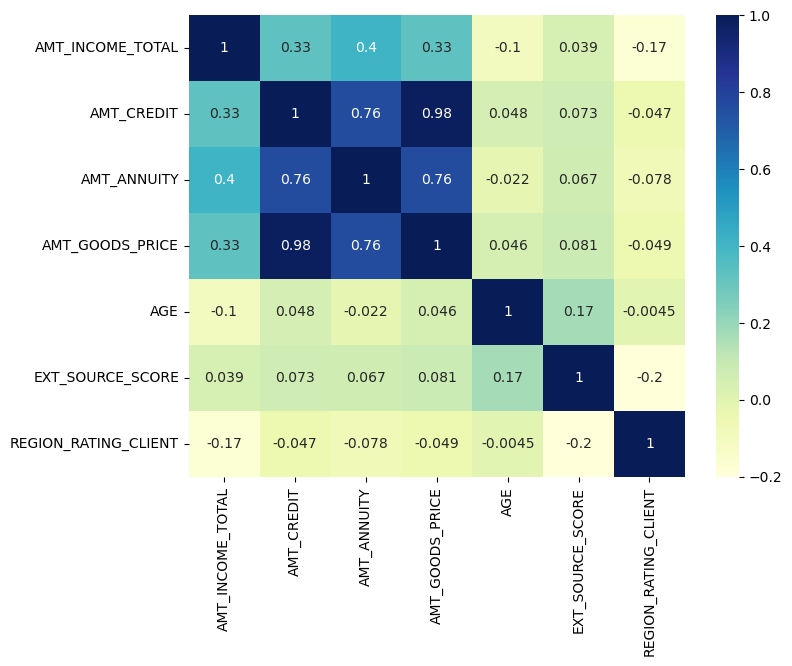

In [592]:
# Plotting heatmap for above corelation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_corr_target_0.corr(),cmap="YlGnBu",annot=True)
plt.show()

#### Insights/Observations:
**Highly corelated columns for non defaulters**
1. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
2. AMT_CREDIT and AMT_ANNUITY (0.76)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.76)

**Inference** - 
The same columns are highly corelated for both defaulters and non defaulters categories.

#### Defaulters Vs Non-defaulters on the basis of gender and total income

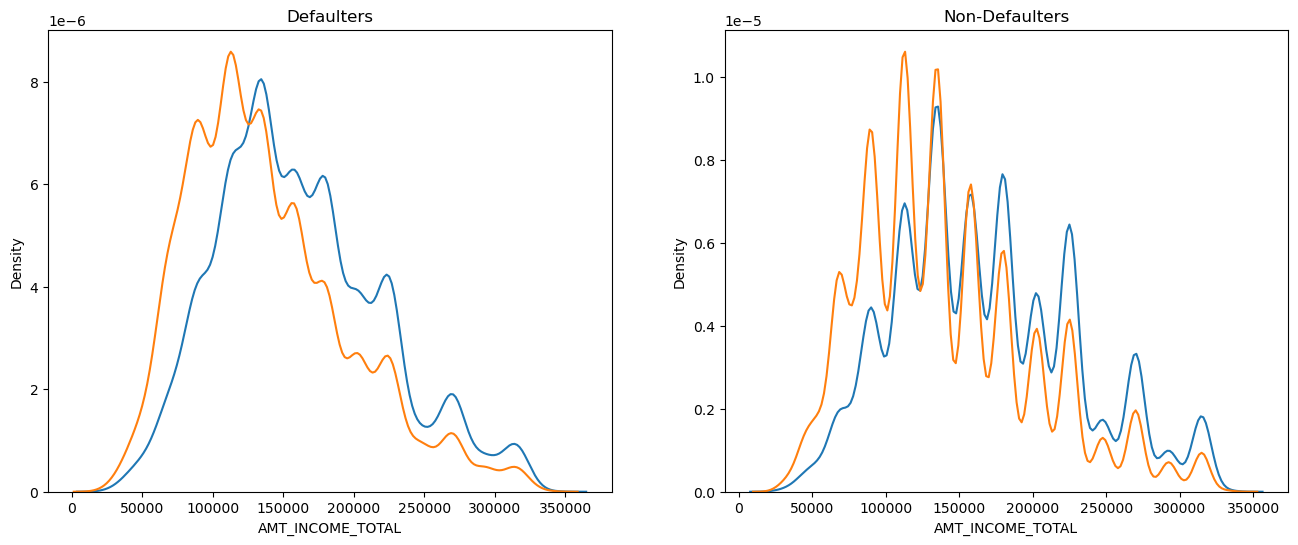

In [593]:
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = df_curr_app_target_1[df_curr_app_target_1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label= i)
    
plt.subplot(1,2,2) 
plt.title('Non-Defaulters')
for i in gender:
    subset = df_curr_app_target_0[df_curr_app_target_0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label= i)
plt.show()

##### Insight/Observation:
1. Defaulters - Pattern for being a defaulter in both the genders (male and female) are almost equal at all income levels. The spike of being defaulters is from 50000 to 120000.
2. Non defaulters - Females are higher numbers as non-defaulters on the lower income level but lesser numbers on higher income levels. The spike is more for both the genders from 75000 to 150000.

### Bivariate analysis on continious numerical variables

#### Credit amount of the loan on the basis of client income for both male and female

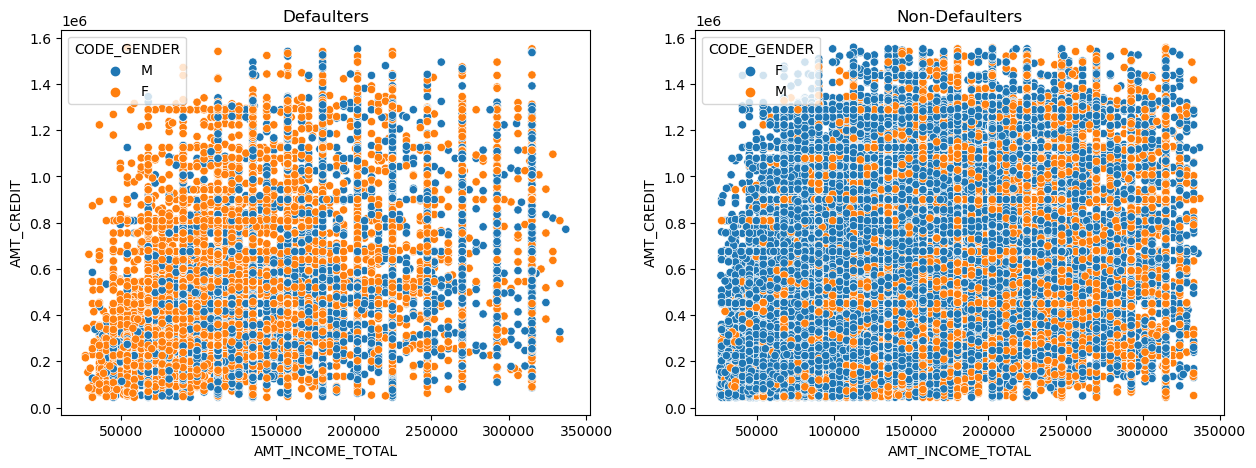

In [594]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=df_curr_app_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=df_curr_app_target_0)
plt.title('Non-Defaulters')
plt.show()

##### Insights/Observations:
1. **Defaulters** - It is evident from the plots that the values are more concentrated on the lower income and lower credit of the applications. With increase in income, credit amount increases for both the genders.
2. **Non defaulters** - No evident pattern can be seen.

#### Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client

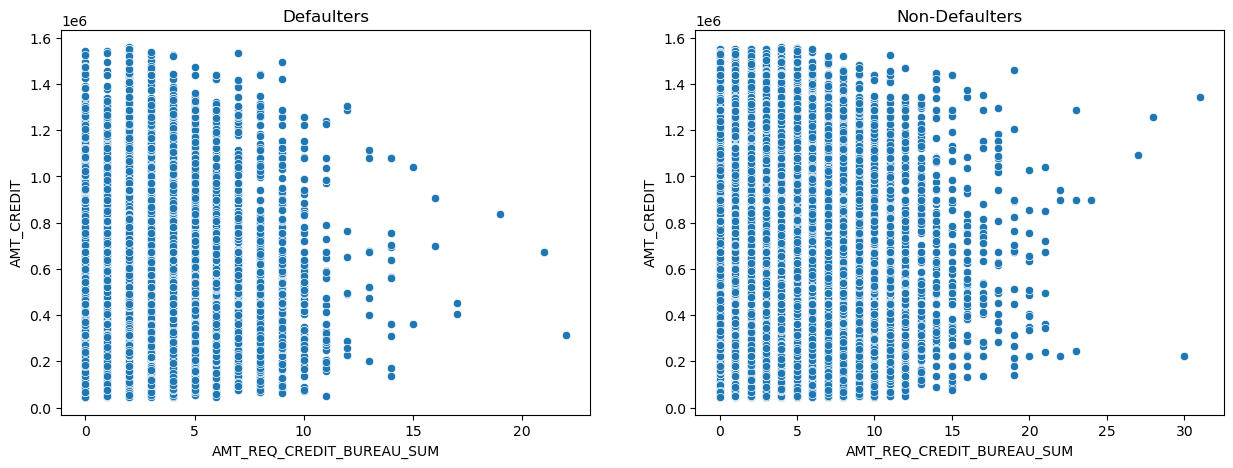

In [595]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_SUM','AMT_CREDIT', data=df_curr_app_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_SUM','AMT_CREDIT', data=df_curr_app_target_0)
plt.title('Non-Defaulters')
plt.show()

##### Insight/Observation:
A very weak trend is observed for both defaulters and non-defaulters - More credit bureau enquires are associated with lesser credit amount approvals.

### Bivariate analysis on the categorical variables

#### Credit Amount vs Credit Groups

In [596]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']
categories

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'AGE_GROUP',
 'INCOME_GROUP',
 'EXT_SCORE_CATEGORY']

#### Defaulters

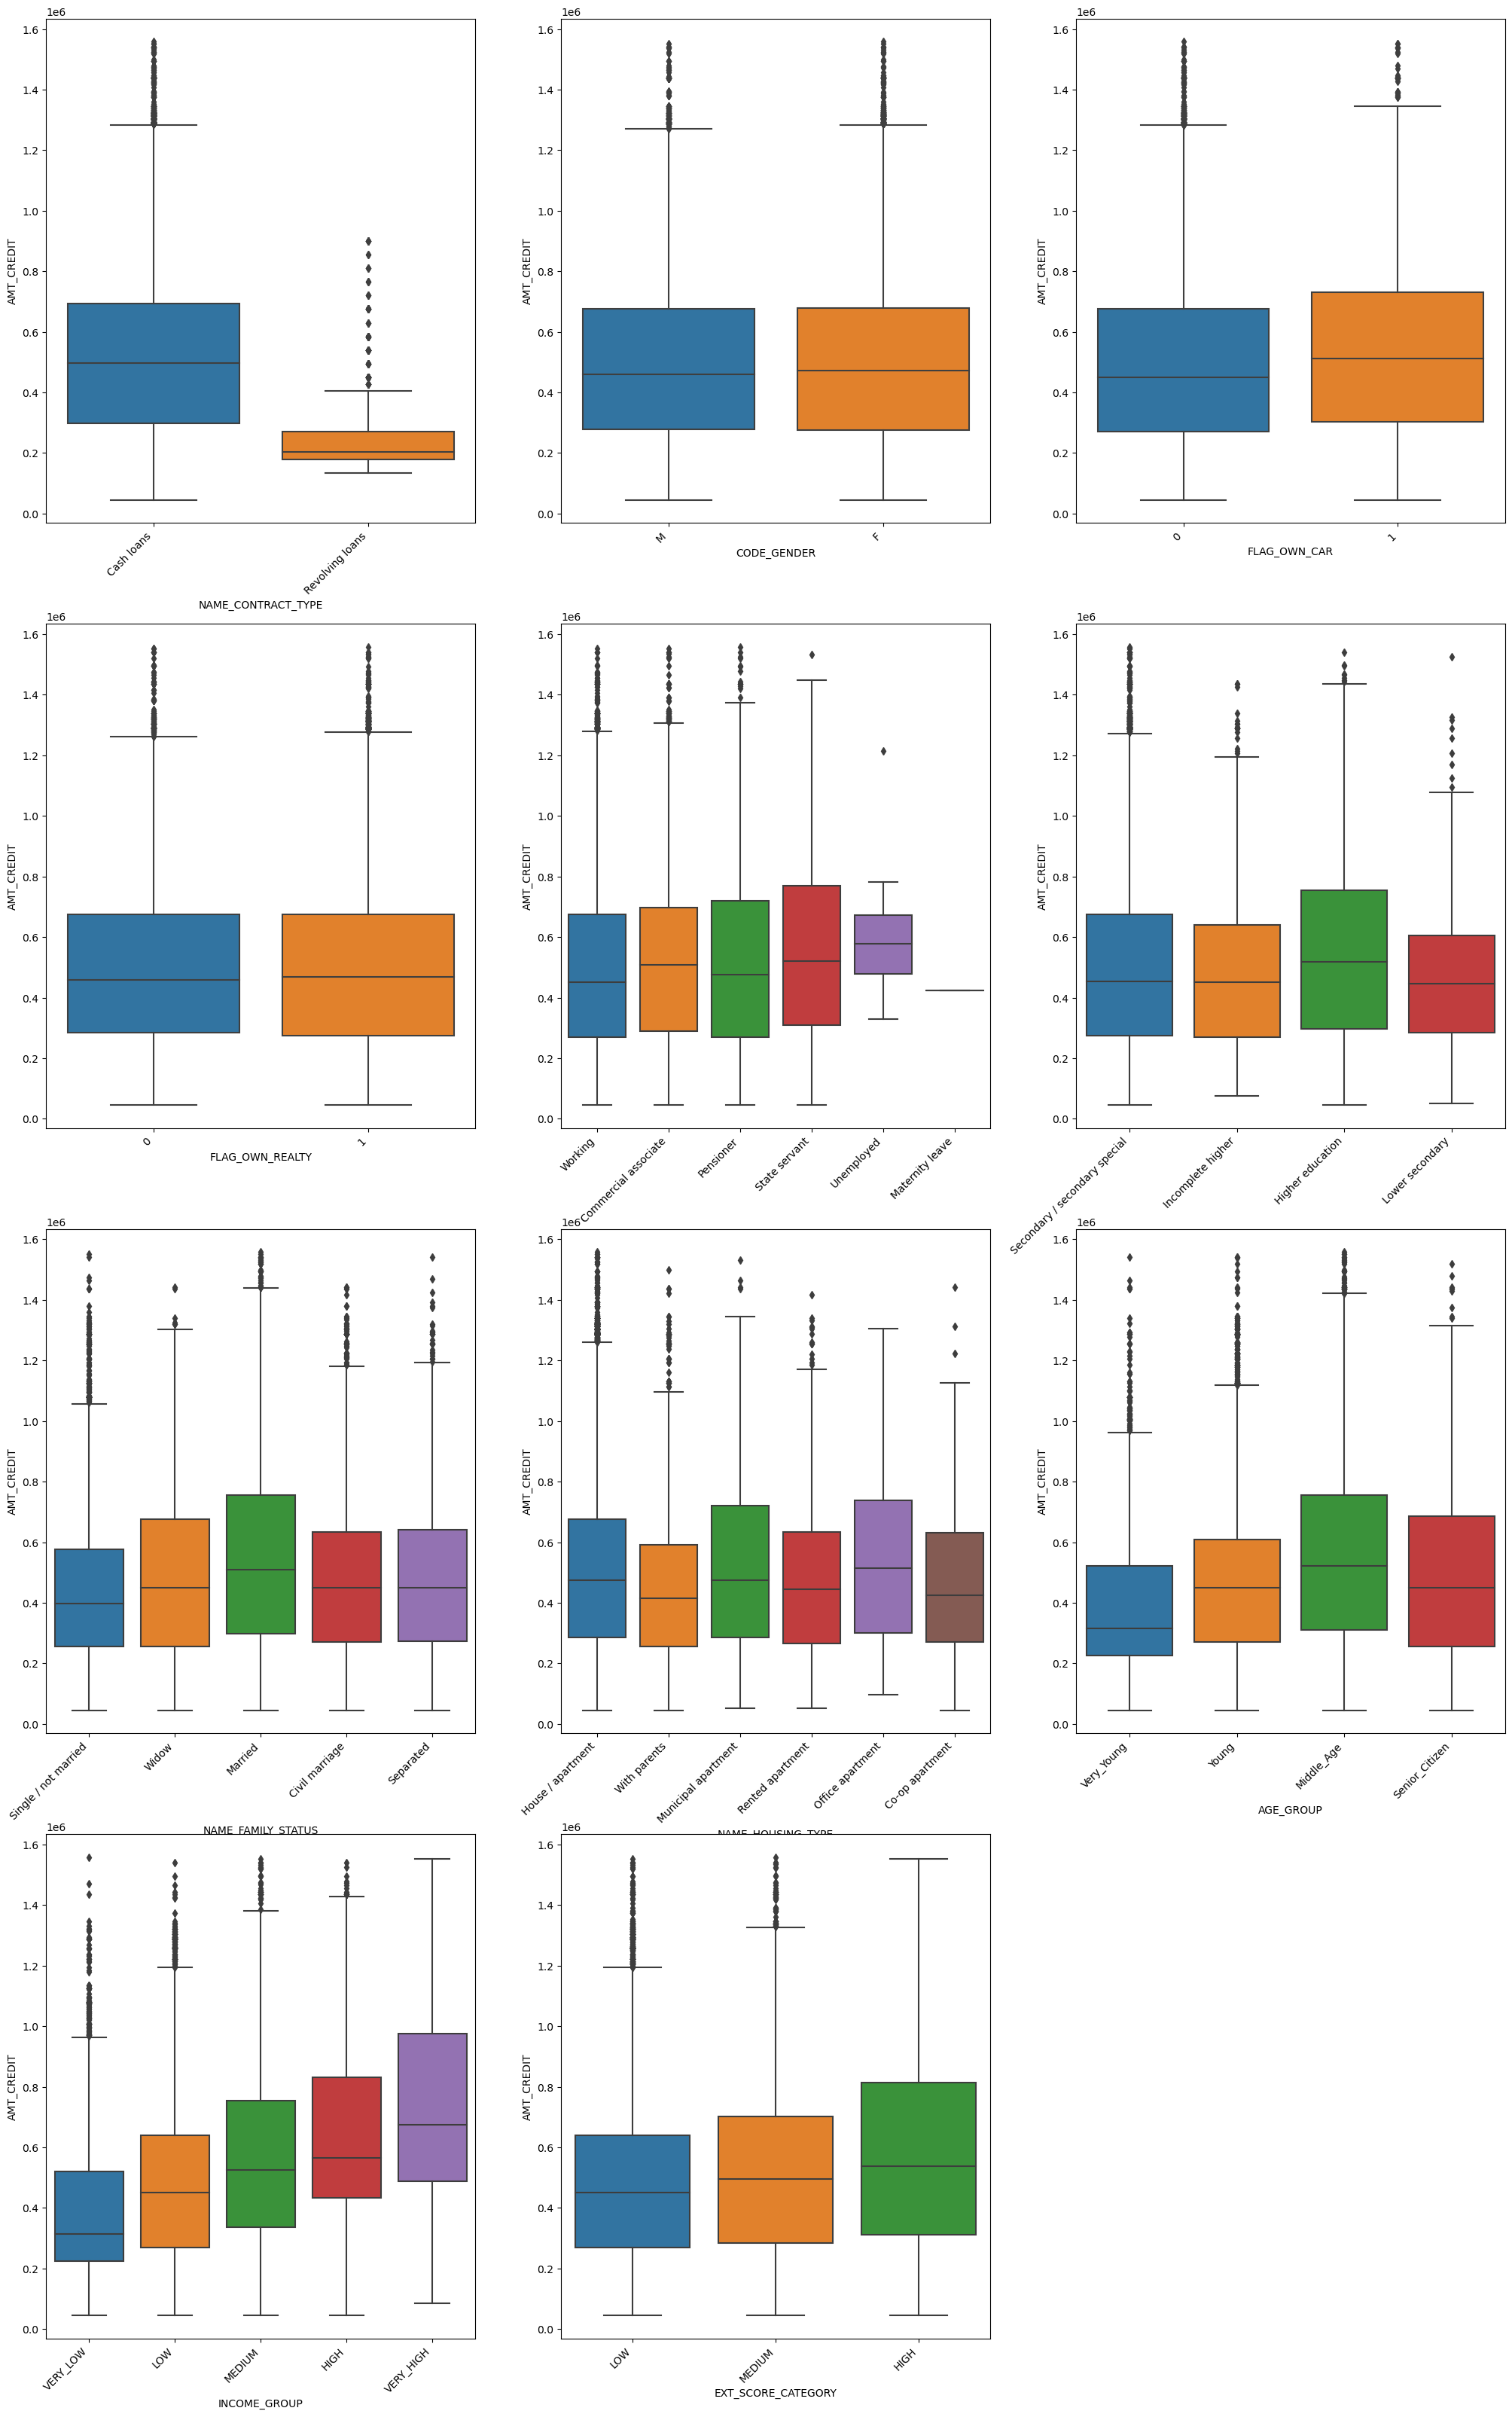

In [597]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_curr_app_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Insight/Observations:
1. Credit amount of Revolving loans are very low
2. There is no apparent difference in credit amount vs genders, owning car and owning realty in defaulted section.
3. Credit amount approved for Very Young and Young clients is much lower as compared to Middle aged and Senior citizens.
4. Credit amount approved is propertional to the income groups/ranges.
5. Clients having higher external score are approved higher credit amounts.

#### Non-defaulters

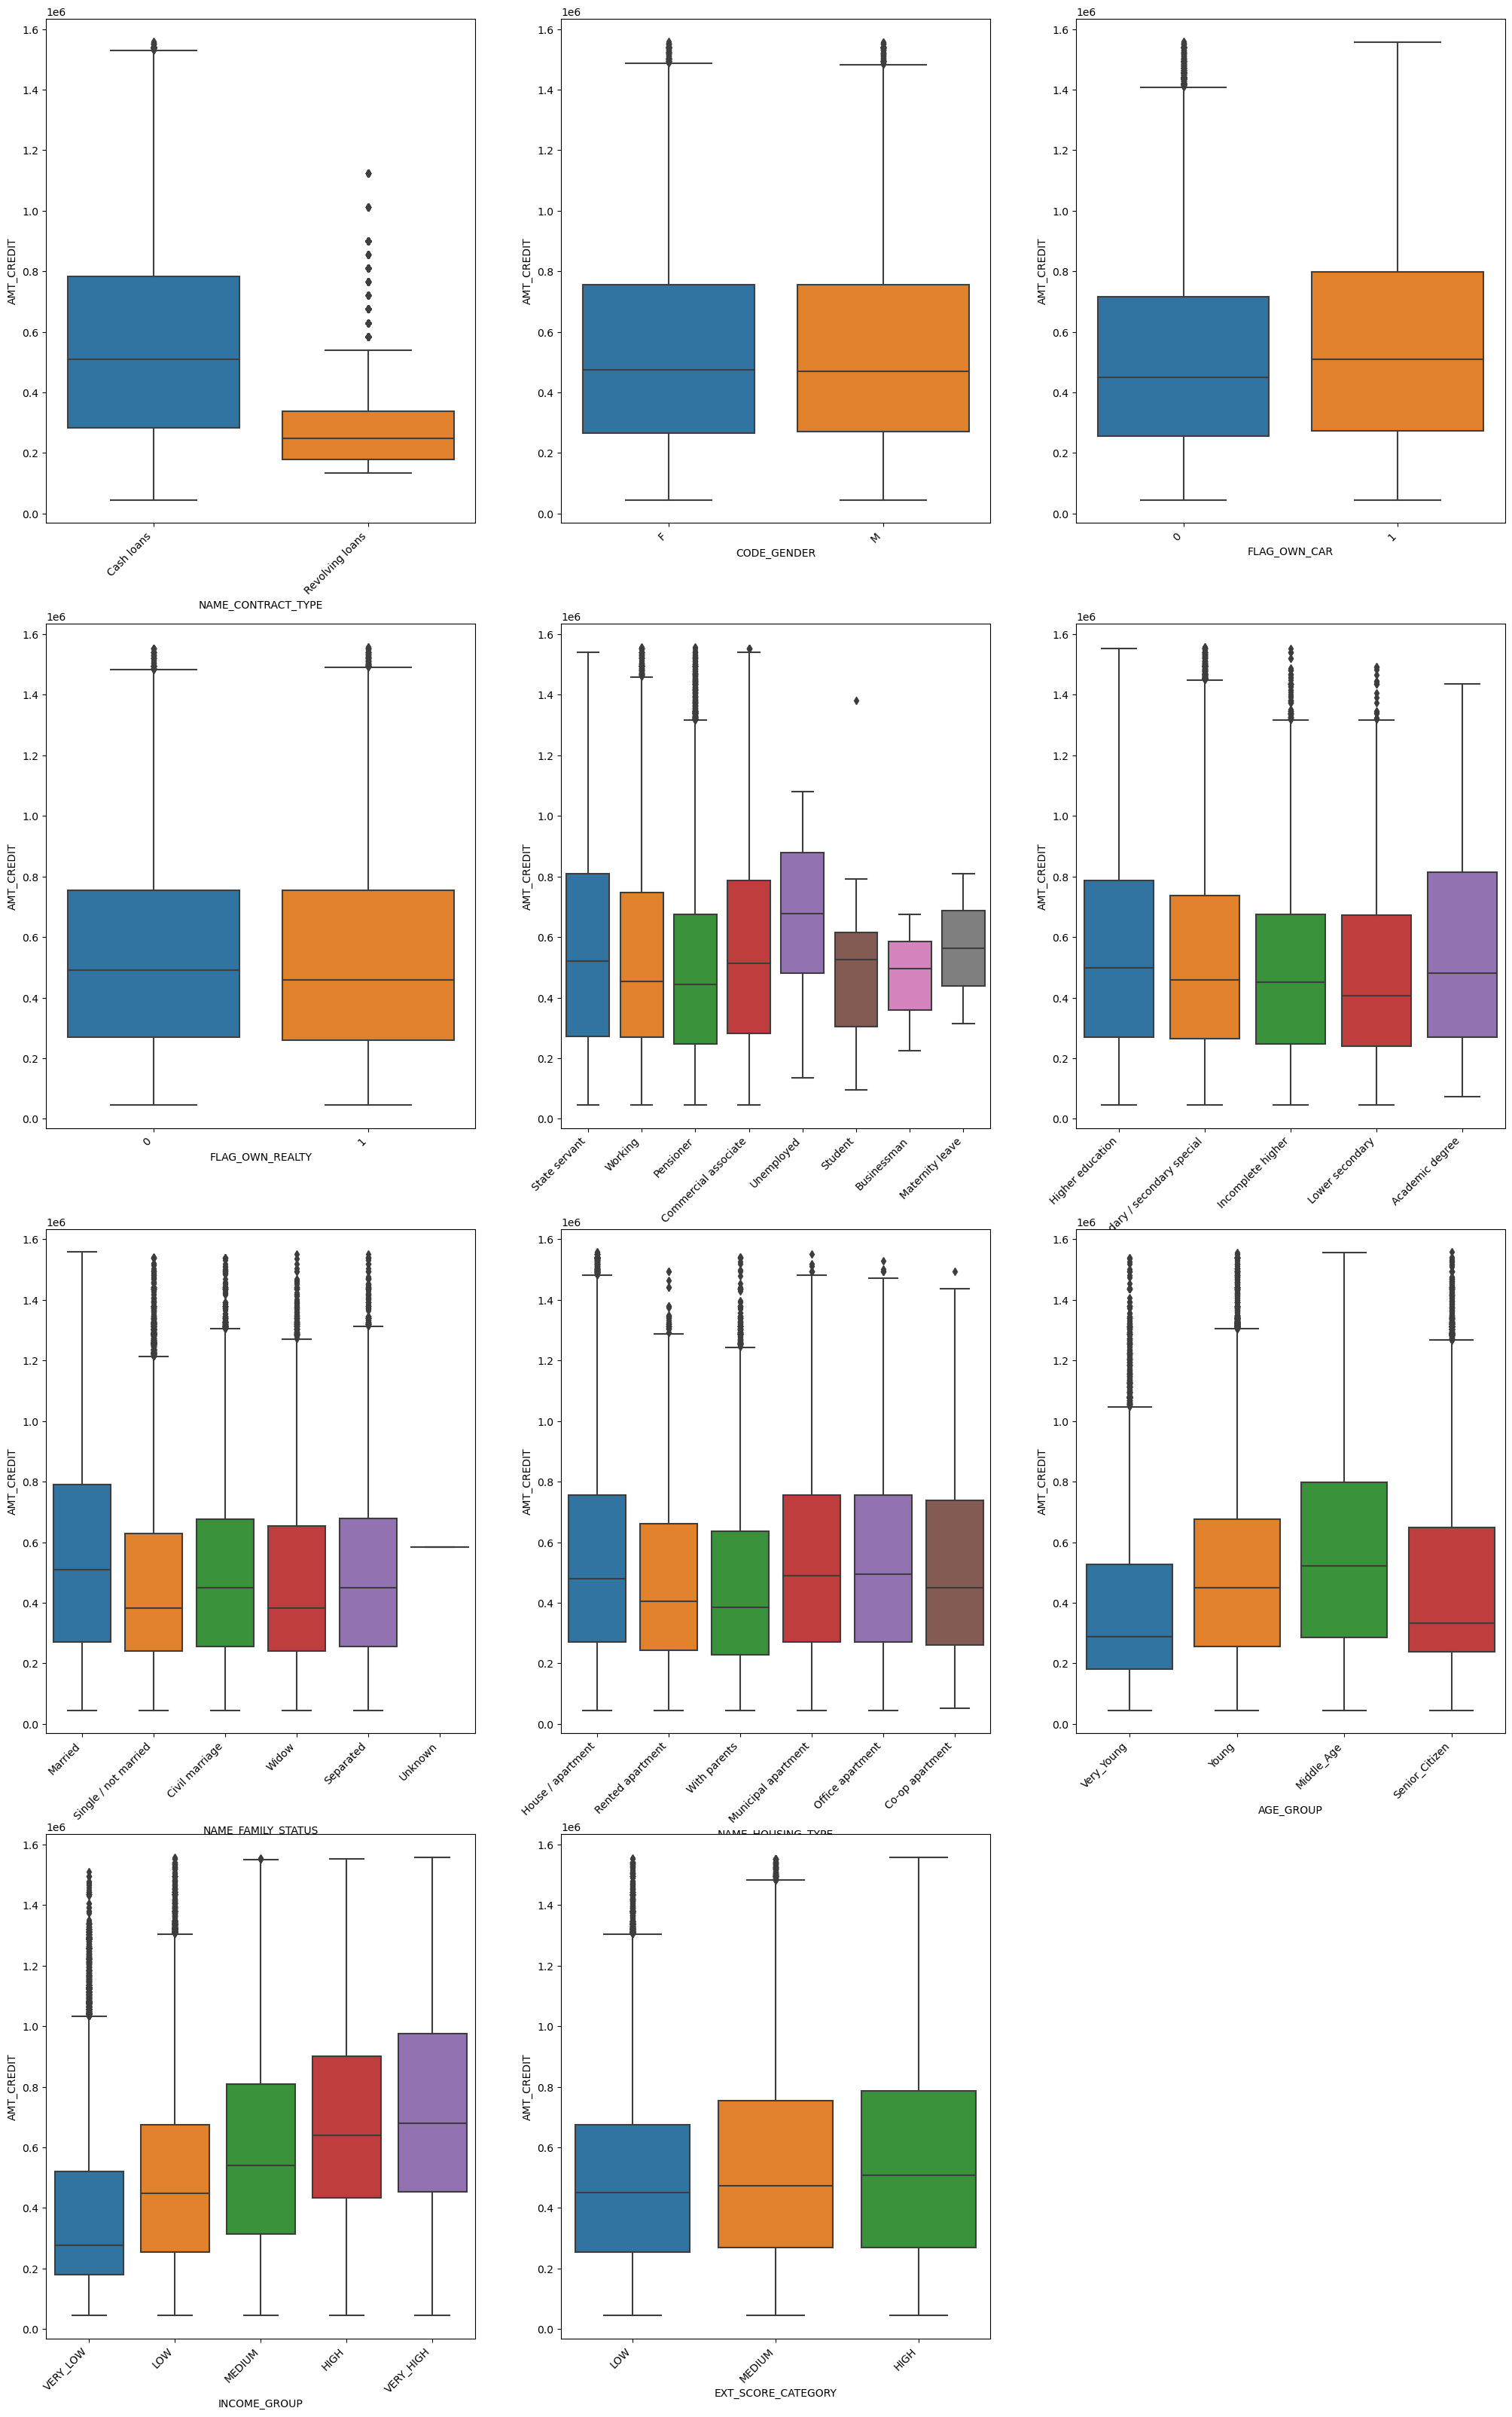

In [598]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_curr_app_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Insight/Observations:
1. Credit amount of Revolving loans are very low
2. There is no apparent difference in credit amount vs genders, owning car and owning realty in non-defaulted section.
3. Credit amount approved for Very Young and Young clients is much lower as compared to Middle aged and Senior citizens.
4. Credit amount approved is propertional to the income groups/ranges.
5. Clients having higher external score are approved higher credit amounts.
6. Unemployed clients have higher credit amounts approved in the non-defaulted segment
7. Married clients have higher credit amount approved

### Bivariate Analysis of two segmented variables 

 #### Income group and gender

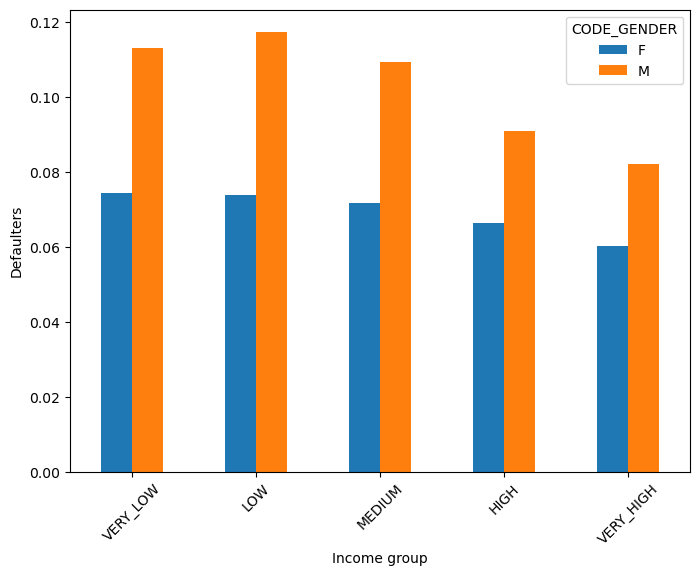

In [599]:
df_curr_app.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')
plt.show()

##### Insight/Observation:
Males are more likely defaulted than Females accross all income groups.

#### Education and gender

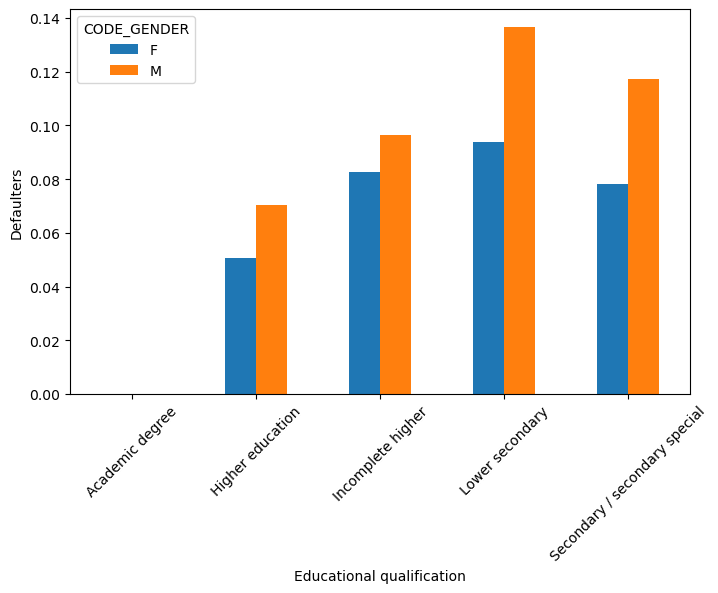

In [600]:
df_curr_app.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')
plt.show()

##### Insight/Observation:
1. `Lower secondary` educated clients are more defaulted followed by `Secondary` and `Incomplete higher` educated clients.
2. Clients with `Higher` and `Academic Degree` education are less likely to be defaulted.
3. Accross all educated level `Females` are less defaulted than male.

 #### Credit amount group and Income group

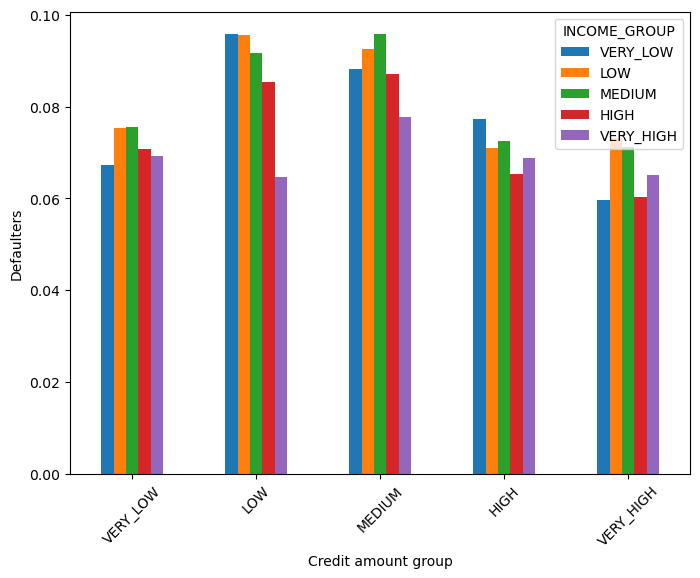

In [601]:
df_curr_app.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')
plt.show()

##### Insight/Observation:
1. Low and Medium credit amount group are highly defaulted across all income groups.
2. Very low and Very high credit amount groups are less likely to default across all income groups.

#### Credit amount group and Age group

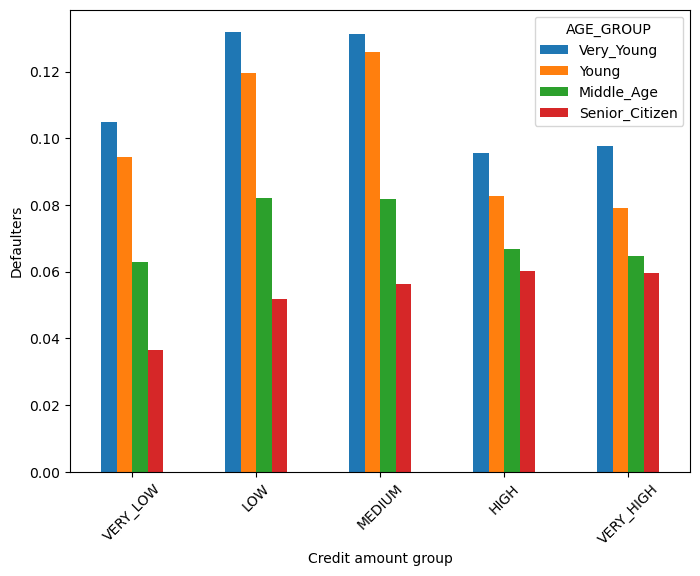

In [602]:
df_curr_app.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')
plt.show()

##### Insight/Observation:
1. Very Young and Young clients with low and medium credit amount group are most defaulted.
2. Senior citizens across all credit amount groups are less likely defaulted.

#### Age group and Income group

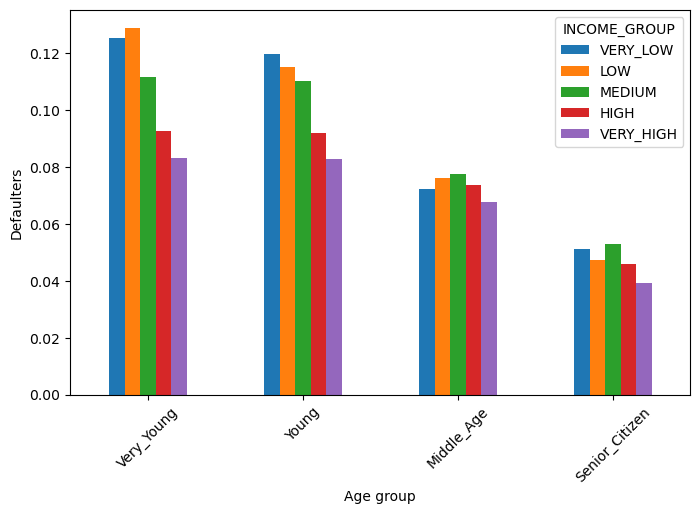

In [603]:
df_curr_app.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')
plt.show()

##### Insight/Observation:
1. Very Young and Young clients are more defaulted than Mid age and senior.
2. Very Young and Young clients with  Very low and low income are most defaulted.
3. For Mid age and senior people the default rate is almost same in all income group.

#### Income Type and Gender

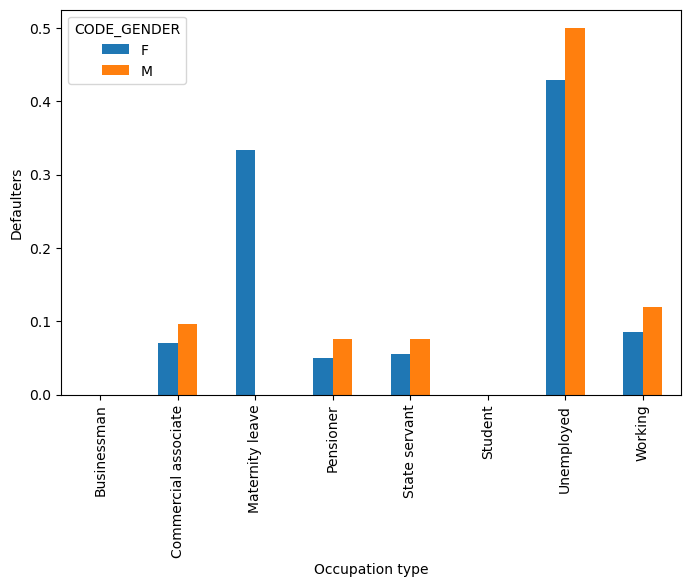

In [604]:
df_curr_app.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Occupation type')
plt.ylabel('Defaulters')
plt.show()

##### Insight/Observation:
1. Unemployed clients are highest group to be defaulted.
2. Clients with maternity leave are are also highly defaulted.
3. The default rate is lesser in all other occupation types.
4. Males are more defaulted as compared to females in each occupation types.

#### Family status and age group

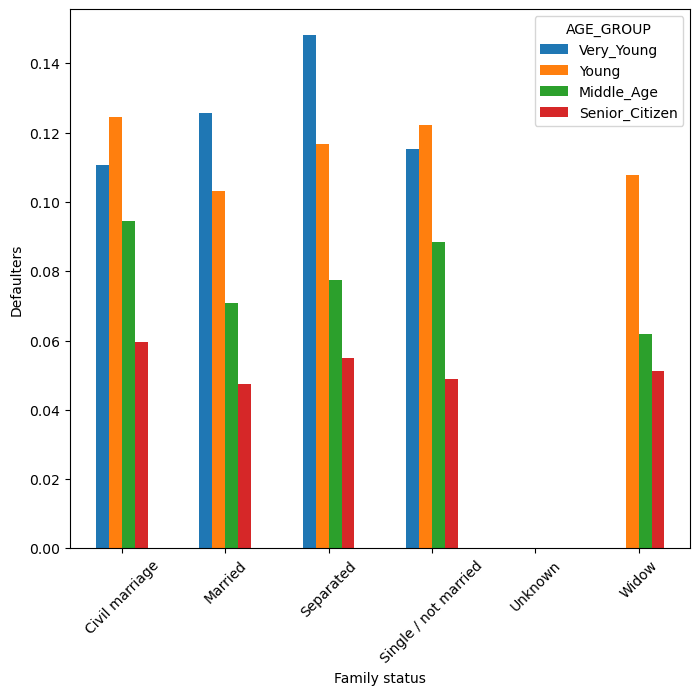

In [605]:
df_curr_app.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')
plt.show()

##### Insight/Observation:
Across all family status the Vey Young and Young clients are most defaulted and Senior citizen are least defaulted.

#### Family status and Gender

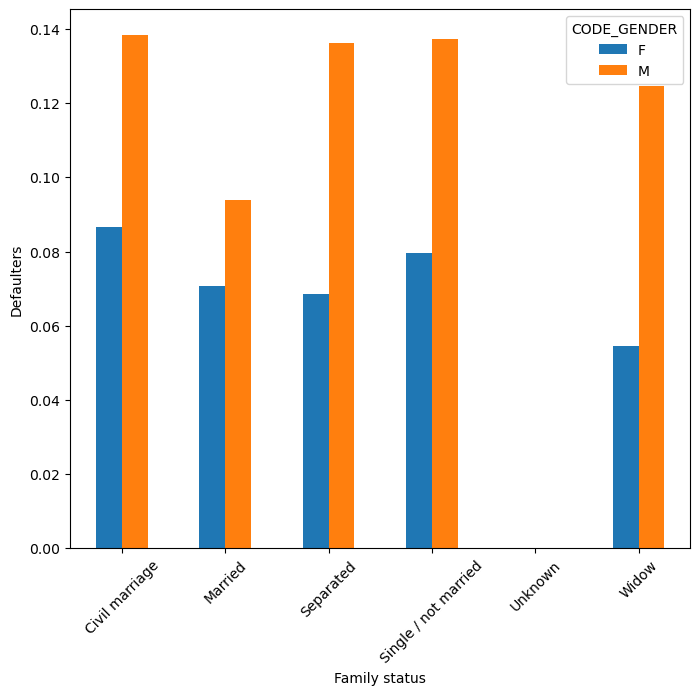

In [606]:
df_curr_app.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')
plt.show()

##### Insight/Observation:
1. Across all family status the Male clients are more defaulted than Female.
2. Married clients are comparatively less defaulted.

#### Previous Application Dataframe

In [607]:
# Reading'previous_application.csv' into df_prev_app dataframe and viewing first 5 records
df_prev_app = pd.read_csv('previous_application.csv')
df_prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [608]:
# Viewing last 5 records of previous application dataframe 
df_prev_app.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   
1670212                NaN                    NaN                       NaN   
1670213                NaN                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
1670209  Cash through the bank                XAP              NaN   
1670210  Cash through the bank                XAP    Unaccompanied   
1670211  Cash through the bank                XAP  Spouse, partner   
1670212  Cash through the bank                XAP           Family   
1670213  Cash through the bank                XAP           Family   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE     CHANNEL_TYPE  SELLERPLACE_AREA  \
1670209               XNA            Stone                43   
1670210               XNA            Stone                43   
1670211               XNA     Country-wide              1370   
1670212            x-sell  AP+ (Cash loan)                -1   
1670213            x-sell  AP+ (Cash loan)                -1   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1670209             Furniture         30.0       low_normal   
1670210             Furniture         12.0           middle   
1670211  Consumer electronics         10.0       low_normal   
1670212                   XNA         12.0       low

In [609]:
# Inspecting dimension of previous application dataframe 
df_prev_app.shape

(1670214, 37)

In [610]:
# Inspecting columns available and data type in previous application dataframe 
df_prev_app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [611]:
# Inspecting the statistical summary of numerical features in previous application dataframe 
df_prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

#### Handling missing values in columns

**Replacing all the XNA and XAP to np.null**
Because looks like these values entered in the application as blank or may be not applicable.

In [612]:
df_prev_app.replace('XNA',np.nan,inplace=True)
df_prev_app.replace('XAP',np.nan,inplace=True)

In [613]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (df_prev_app.columns[(round(100*(df_prev_app.isnull().sum()/len(df_prev_app.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [614]:
# Delete the columns having more than 30% missing values
df_prev_app = df_prev_app.drop(cols_30_percent_missing_values,axis=1)

##### List and delete the columns, which are not much relevant for the analysis

In [615]:
df_prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [616]:
cols_irrelevant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [617]:
# Delete the columns which are irrelevant for the analysis
df_prev_app = df_prev_app.drop(cols_irrelevant,axis=1)

In [618]:
df_prev_app.shape

(1670214, 15)

#### Treating Missing Values in Rows

In [619]:
# Count the number of rows having more than 50% missing values and delete those rows if applicable
len(df_prev_app[df_prev_app.isnull().sum(axis=1) > (len(df_prev_app.columns)//2)].index)

0

In [ ]:
# Percent of missing values in columns
(round(100*(df_prev_app.isnull().sum()/len(df_prev_app.index)),2))

In [620]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are missing
len(df_prev_app[np.isnan(df_prev_app['AMT_ANNUITY']) & np.isnan(df_prev_app['CNT_PAYMENT']) & np.isnan(df_prev_app['AMT_GOODS_PRICE'])])

333855

In [621]:
# Percentage of rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are missing
333855/1670214*100

19.9887559318746

In [622]:
# Dropping rows (20%) for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are missing
df_prev_app = df_prev_app[(~(np.isnan(df_prev_app['AMT_ANNUITY']) & np.isnan(df_prev_app['AMT_GOODS_PRICE']) & np.isnan(df_prev_app['CNT_PAYMENT'])))]

In [623]:
# Updated dimension of df_prev_app
df_prev_app.shape

(1336359, 15)

In [624]:
# Reviewing percentage of missing values in df_prev_app dataframe
(round(100*(df_prev_app.isnull().sum()/len(df_prev_app.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             2.87
PRODUCT_COMBINATION     0.00
dtype: float64

In [625]:
# Count the rows for which AMT_ANNUITY is null
len(df_prev_app[np.isnan(df_prev_app['AMT_ANNUITY'])])

38380

In [626]:
# As there are only 38380 rows we can delte those records
df_prev_app = df_prev_app[~(np.isnan(df_prev_app['AMT_ANNUITY']))]

In [627]:
# Updated dimension of df_prev_app
df_prev_app.shape

(1297979, 15)

In [628]:
# Reviewing percentage of missing values in df_prev_app dataframe
(round(100*(df_prev_app.isnull().sum()/len(df_prev_app.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [629]:
# Updated dimension of df_prev_app
df_prev_app.shape

(1297979, 15)

### Removing outliers

In [630]:
# Finding outliers in all the numerical columns using IQR rule and removing the outlier records 
col_list_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for col in col_list_outlier: 
    q1 = df_prev_app[col].quantile(0.25)
    q3 = df_prev_app[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_application_prev = df_prev_app.loc[(df_prev_app[col] > range_low) & (df_prev_app[col] < range_high)]

df_prev_app.shape

(1297979, 15)

In [631]:
# Percentage of rows lost
round((100 - 100*(len(df_prev_app.index)/1670214)),2)

22.29

### Checking data imbalance

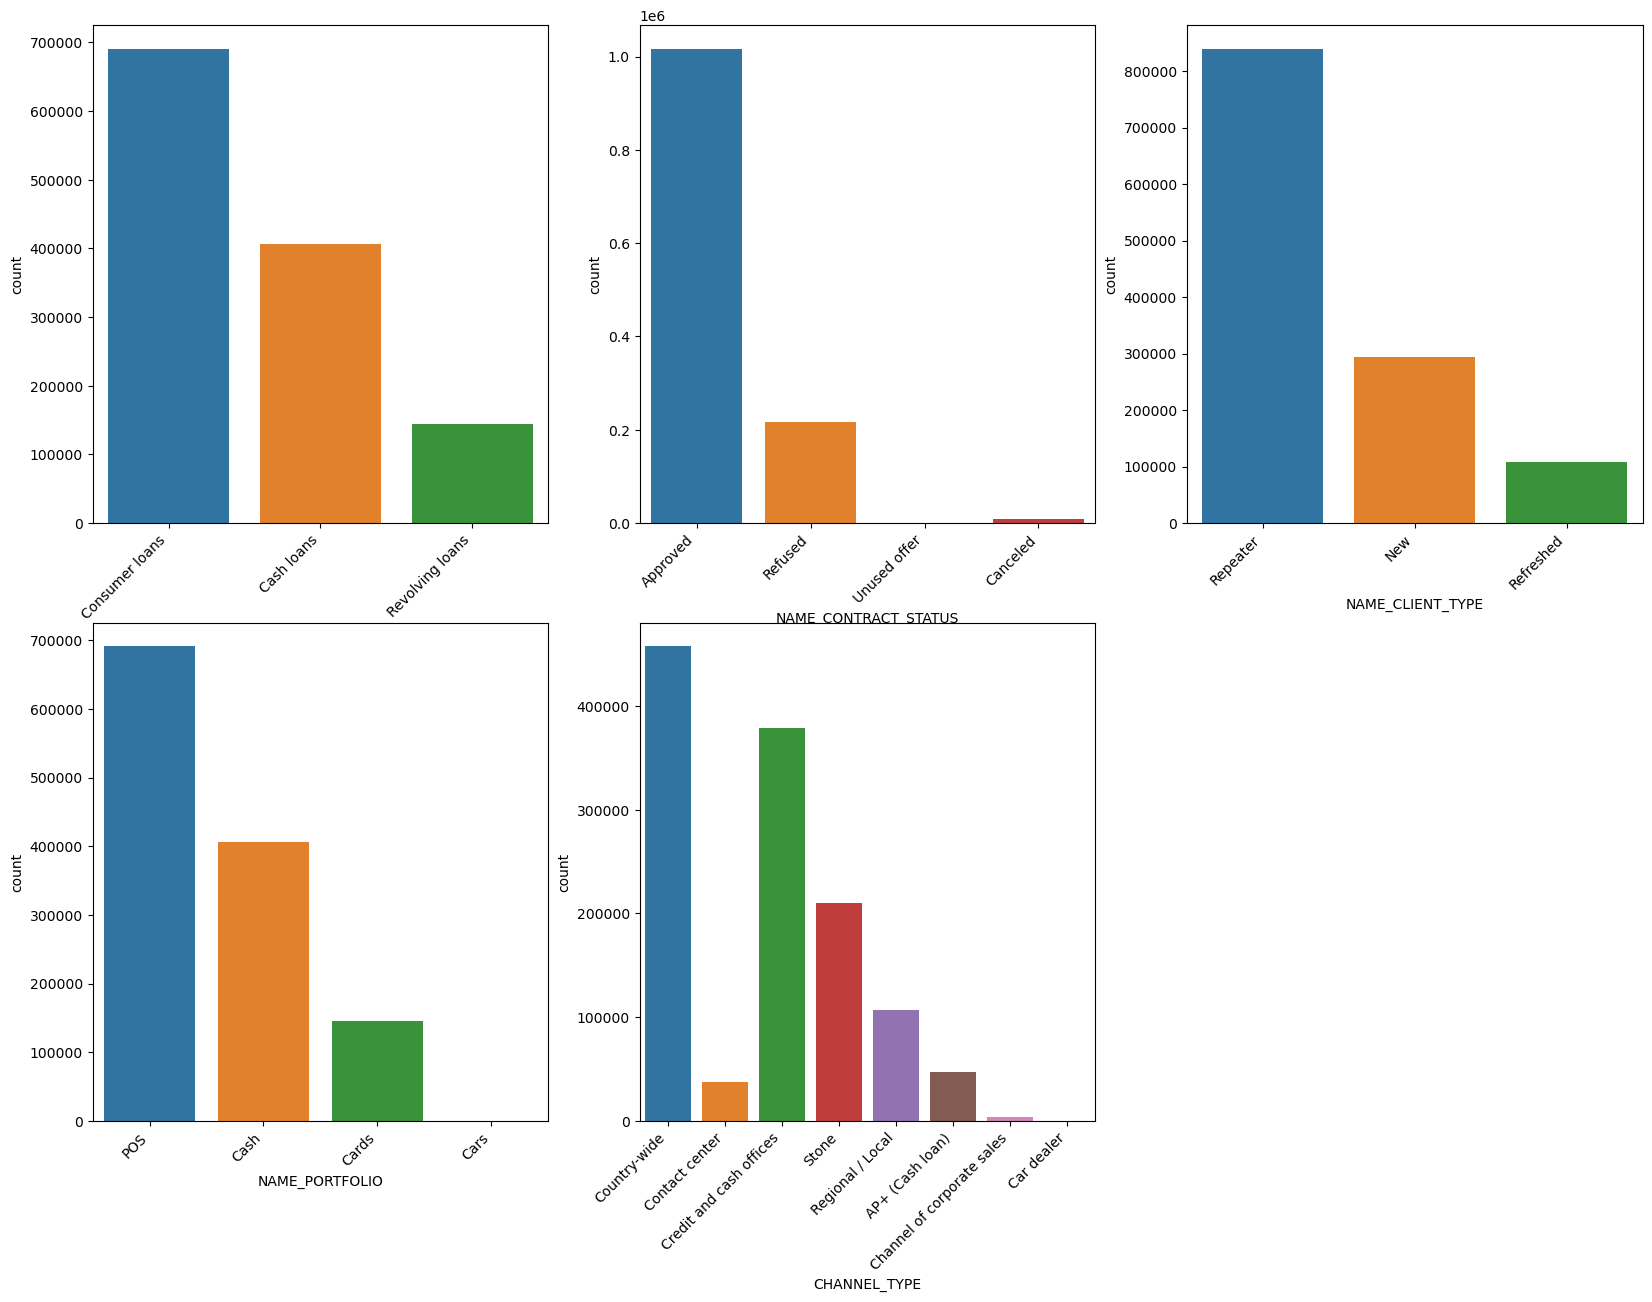

In [632]:
# Listing columns for checking data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    ax = sns.countplot(x = col , data = df_application_prev )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Data imbalance observed in below columns:-
1. NAME_CONTRACT_TYPE - There are very few Revolving Loans
2. NAME_CONTRACT_STATUS - There are very few Refused status. Almost negligible Cancelled/Unused status.
3. NAME_CLIENT_TYPE - There are few New applicanst and even fewer Refreshed applicants.
4. NAME_PORTFOLIO - Very few application for Cards and Cars
5. CHANNEL_TYPE - Except Country-Wide, Credit and Cash offices and Stone all other channels are very few in number.

#### Converting DAYS_DECISION column into MONTH_DECISION column for ease of analysis

In [633]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
df_prev_app['MONTH_DECISION'] = abs(df_prev_app['DAYS_DECISION']//30)

In [634]:
# Drop 'DAYS_DECISION' column
df_prev_app = df_prev_app.drop(['DAYS_DECISION'],axis=1)

In [635]:
df_application_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0     17145.0          17145.0             Approved            -73   
1    679671.0         607500.0             Approved           -164   
2    136444.5         112500.0             Approved           -301   
3    470790.0         450000.0             Approved           -512   
4    404055.0         337500.0              Refused           -781   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  \
0         Repeater            POS             Country-wide                35   
1         Repeater           Cash           Contact center                -1   
2         Repeater           Cash  Credit and cash offices                -1   
3         Repeater           Cash  Credit and cash offices                -1   
4         Repeater           Cash  Credit and cash offices                -1   

   CNT_PAYMENT       PRODUCT_COMBINATION  
0         12.0  POS mobile with interest  
1         36.0          Cash X-Sell: low  
2         12.0         Cash X-Sell: high  
3         12.0       Cash X-Sell: middle  
4         24.0         Cash Street: high

In [636]:
df_application_prev.shape

(1242076, 15)

### Merging Current application and Previous application datasets and performing analysis

In [638]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']
cols_current

['SK_ID_CURR',
 'TARGET',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'AGE_GROUP',
 'INCOME_GROUP',
 'EXT_SCORE_CATEGORY']

In [639]:
# Creating a dataset from current application for merging 
df_current_to_merge = df_curr_app[cols_current]
df_current_to_merge.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
3      100006       0           F  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS   AGE_GROUP INCOME_GROUP EXT_SCORE_CATEGORY  
0  Single / not married  Very_Young       MEDIUM                LOW  
1               Married  Middle_Age         HIGH             MEDIUM  
2  Single / not married  Middle_Age     VERY_LOW               HIGH  
3        Civil marriage  Middle_Age          LOW             MEDIUM  
4  Single / not married  Middle_Age          LOW             MEDIUM

In [640]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']
cols_prev_to_drop

['SELLERPLACE_AREA', 'PRODUCT_COMBINATION', 'AMT_GOODS_PRICE']

In [641]:
# Creating a dataset from previous application for merging
df_prev_to_merge = df_prev_app.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
3    470790.0             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  
0             Country-wide         12.0               3  
1           Contact center         36.0               6  
2  Credit and cash offices         12.0              11  
3  Credit and cash offices         12.0              18  
4  Credit and cash offices         24.0              27

In [642]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
3    470790.0             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3     0.0           F   
1           Contact center         36.0               6     0.0           F   
2  Credit and cash offices         12.0              11     0.0           F   
3  Credit and cash offices         12.0              18     NaN         NaN   
4  Credit and cash offices         24.0              27     0.0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS   AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married  Middle_Age         HIGH   
1  Secondary / secondary special     Civil marriage  Middle_Age     VERY_LOW   
2  Secondary / secondary special            Married       Young     VERY_LOW   
3                            NaN                NaN         NaN          NaN   
4  Secondary / secondary special            Married       Young       MEDIUM   

  EXT_SCORE_CATEGORY  
0             MEDIUM  
1             MEDIUM  
2                LOW  
3                NaN  
4             MEDIUM

In [643]:
df_merged.shape

(1297979, 19)

In [644]:
len(df_merged[np.isnan(df_merged['TARGET'])])

299606

#### Treating NaN values in merged dataframe

In [645]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]         

In [646]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

In [647]:
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   
5    340573.5             Approved         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3       0           F   
1           Contact center         36.0               6       0           F   
2  Credit and cash offices         12.0              11       0           F   
4  Credit and cash offices         24.0              27       0           F   
5  Credit and cash offices         18.0              23       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS   AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married  Middle_Age         HIGH   
1  Secondary / secondary special     Civil marriage  Middle_Age     VERY_LOW   
2  Secondary / secondary special            Married       Young     VERY_LOW   
4  Secondary / secondary special            Married       Young       MEDIUM   
5  Secondary / secondary special     Civil marriage  Middle_Age       MEDIUM   

  EXT_SCORE_CATEGORY  
0             MEDIUM  
1             MEDIUM  
2                LOW  
4             MEDIUM  
5             MEDIUM

Creating a new derived column "PERCENT_CREDIT" for percentage credit amount wrt applied amount for each client

In [648]:
df_merged['PERCENT_CREDIT'] = round(((df_merged['AMT_CREDIT']/df_merged['AMT_APPLICATION'])*100),2)
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   
5    340573.5             Approved         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3       0           F   
1           Contact center         36.0               6       0           F   
2  Credit and cash offices         12.0              11       0           F   
4  Credit and cash offices         24.0              27       0           F   
5  Credit and cash offices         18.0              23       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS   AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married  Middle_Age         HIGH   
1  Secondary / secondary special     Civil marriage  Middle_Age     VERY_LOW   
2  Secondary / secondary special            Married       Young     VERY_LOW   
4  Secondary / secondary special            Married       Young       MEDIUM   
5  Secondary / secondary special     Civil marriage  Middle_Age       MEDIUM   

  EXT_SCORE_CATEGORY  PERCENT_CREDIT  
0             MEDIUM          100.00  
1             MEDIUM          111.88  
2                LOW          121.28  
4             MEDIUM          119.72  
5             MEDIUM          108.12

### Univariate analysis on unordered categorical variable

#### Previous Loan status

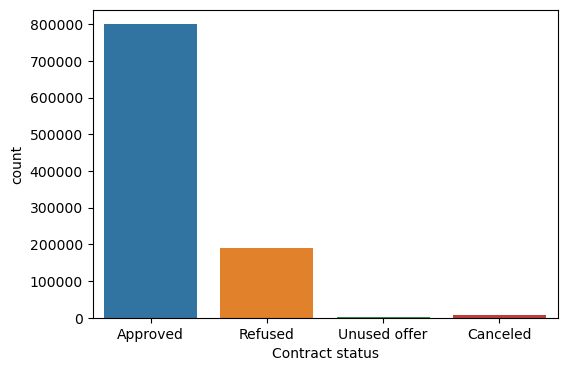

In [649]:
plt.figure(figsize=(6,4))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged)
ax.set(xlabel='Contract status')
plt.show()

##### Insight/Observation:
There are very high number of Approved status fas compared to Refused status. Canceled and Unused offer are almost negligible.

#### Client type

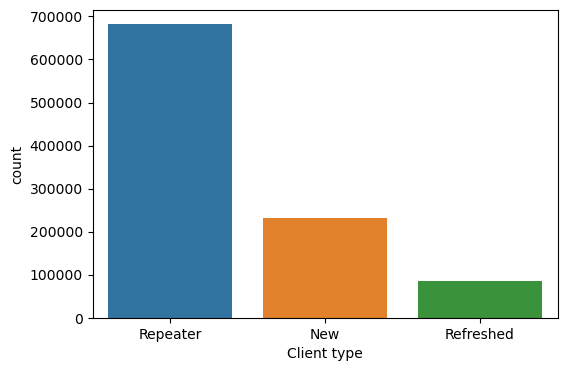

In [650]:
plt.figure(figsize=(6,4))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged)
ax.set(xlabel='Client type')
plt.show()

##### Insight/Observation:
Majority of clients are Repeater

#### Portfolio of the previous applications

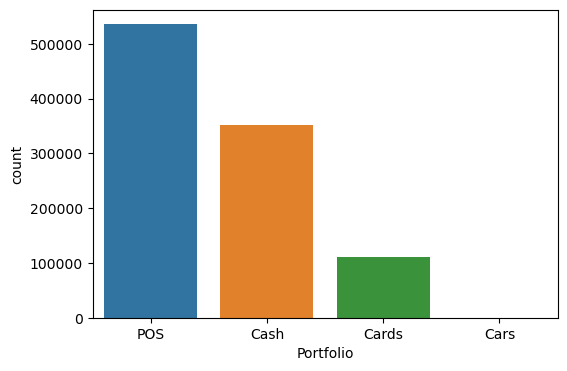

In [651]:
plt.figure(figsize=(6,4))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged)
ax.set(xlabel='Portfolio')
plt.show()

##### Insight/Observation:
POS is the biggest portfolio of previous applications followed by Cash. Cards is low and Cars is negligible.

#### Application channel type

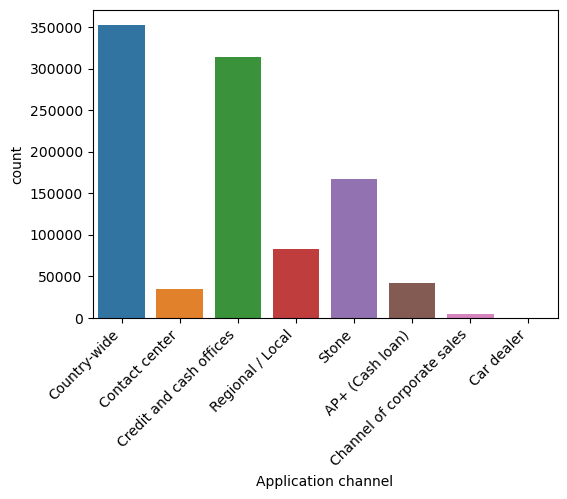

In [652]:
plt.figure(figsize=(6,4))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')
plt.show()

##### Insight/Observation:
Country-wide and Credit and Cash offices are most popular channels for previous applications. Stoneand and Regional are average and remainig channels are low.

### Univariate analysis for continious variables

#### Application Amount

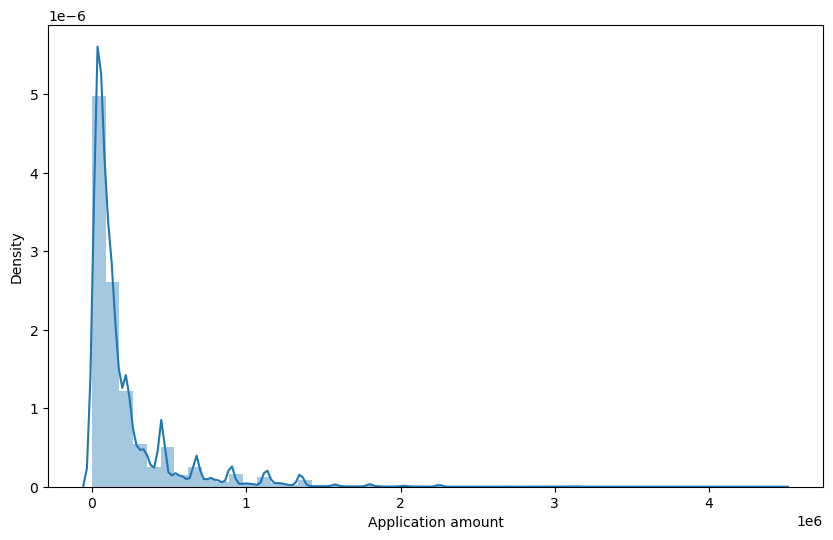

In [653]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_APPLICATION'])
ax.set(xlabel='Application amount')
plt.show()

##### Insight/Observation:
Majority of the applications have an application amount below 250000 as per above above distribution.

#### Credit Amount

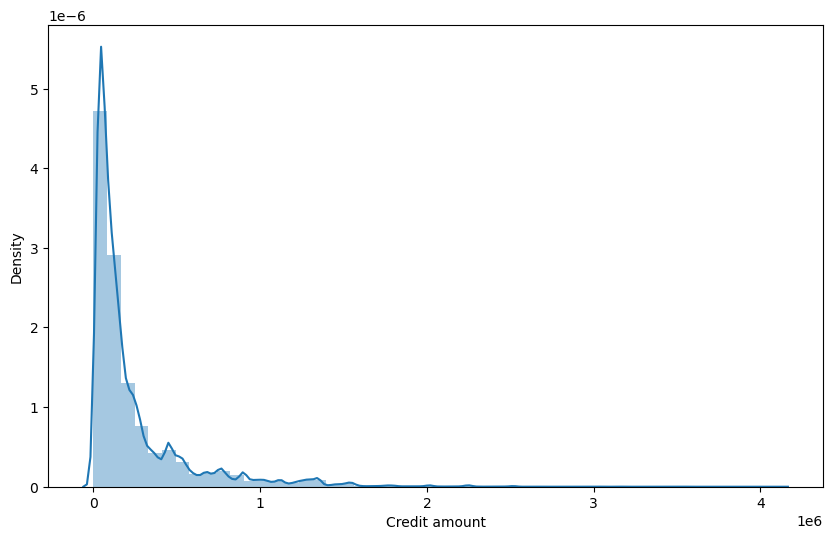

In [654]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_CREDIT'])
ax.set(xlabel='Credit amount')
plt.show()

##### Insight/Observation:
The distribution of the credit amount was mostly below 250000.

####  Previous application decision time relative to the current application in months

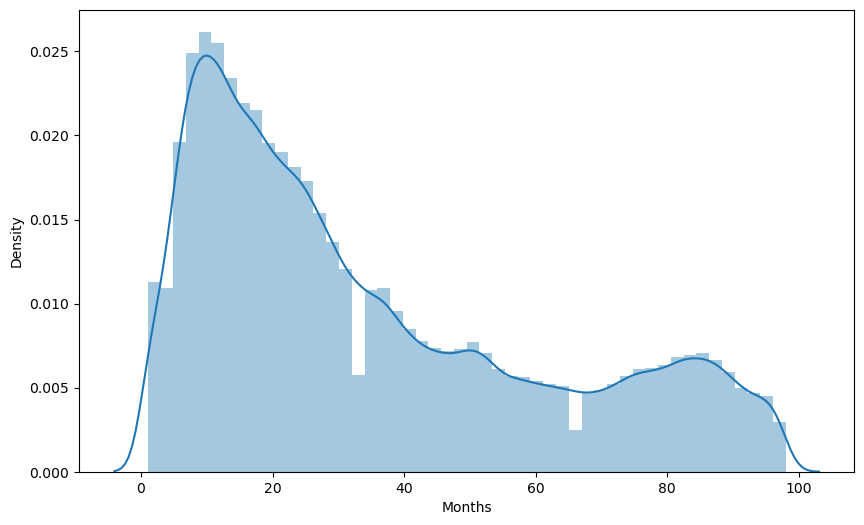

In [655]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['MONTH_DECISION'])
ax.set(xlabel='Months')
plt.show()

##### Insight/Observation:
Majority of the applications decision time is upto 30 months and maximum time taken is upto 100 months.

## Bivariate analysis

#### Corelation of relevant numerical columns

In [656]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [657]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  PERCENT_CREDIT  CNT_PAYMENT  \
0          17145.0     17145.0     1730.430          100.00         12.0   
1         607500.0    679671.0    25188.615          111.88         36.0   
2         112500.0    136444.5    15060.735          121.28         12.0   
4         337500.0    404055.0    31924.395          119.72         24.0   
5         315000.0    340573.5    23703.930          108.12         18.0   

   MONTH_DECISION  
0               3  
1               6  
2              11  
4              27  
5              23

In [658]:
# Corelation matrix
df_merged_corr.corr()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  PERCENT_CREDIT  \
AMT_APPLICATION         1.000000    0.970405     0.811506        0.192208   
AMT_CREDIT              0.970405    1.000000     0.823674        0.262507   
AMT_ANNUITY             0.811506    0.823674     1.000000        0.214049   
PERCENT_CREDIT          0.192208    0.262507     0.214049        1.000000   
CNT_PAYMENT             0.692219    0.682135     0.417502        0.382742   
MONTH_DECISION         -0.307308   -0.312584    -0.291410       -0.279098   

                 CNT_PAYMENT  MONTH_DECISION  
AMT_APPLICATION     0.692219       -0.307308  
AMT_CREDIT          0.682135       -0.312584  
AMT_ANNUITY         0.417502       -0.291410  
PERCENT_CREDIT      0.382742       -0.279098  
CNT_PAYMENT         1.000000       -0.251773  
MONTH_DECISION     -0.251773        1.000000

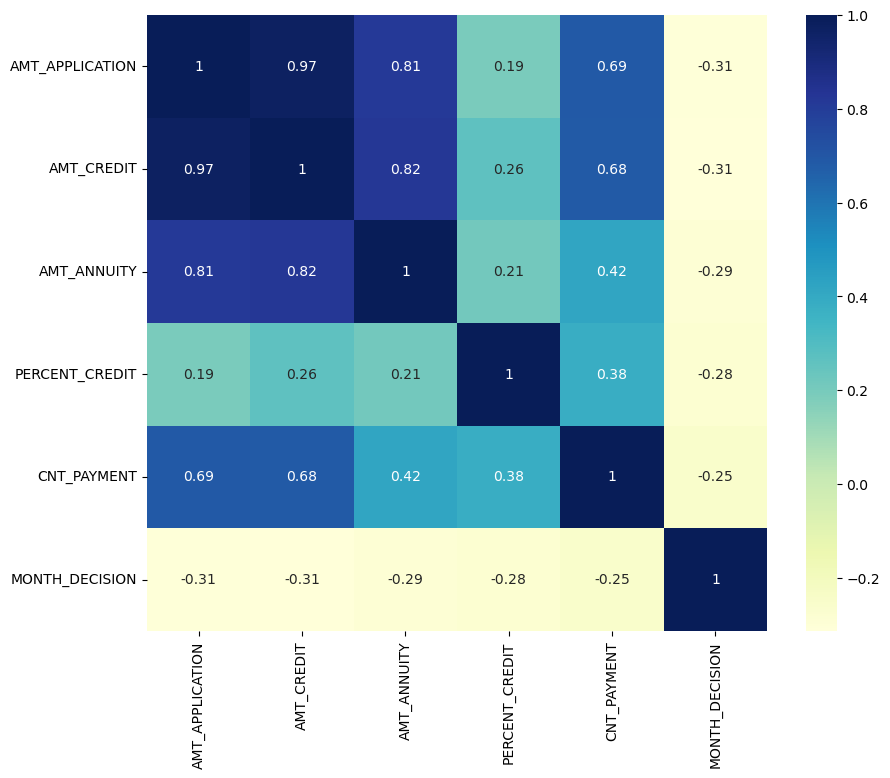

In [659]:
# Plotting heatmap for corelation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Highly corelated columns**
1. AMT_APPLICATION and AMT_CREDIT (0.97)
2. AMT_APPLICATION and AMT_ANNUITY (0.81)
3. AMT_CREDIT and AMT_ANNUITYc(0.82)

**Moderately corelated columns**
1. AMT_APPLICATION and CNT_PAYMENT (0.69)
2. AMT_CREDIT and CNT_PAYMENT (0.68)

### Bivariate analysis on continious variable

#### Application amount and Credit amount

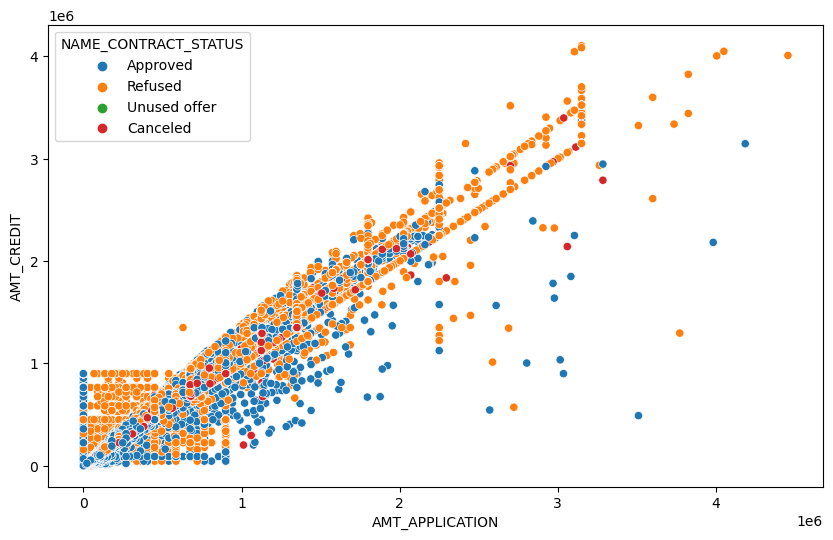

In [660]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

##### Insight/Observation:
1. Credit amount is propertional to Application amount
2. Applications are concentated on lower application and credit amounts

#### Decision time (in months) vs Application amount

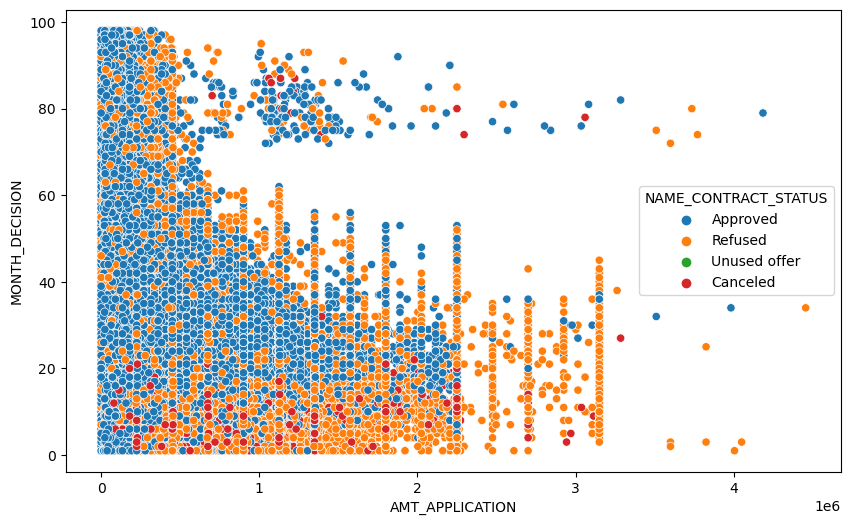

In [662]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

##### Insight/Observation:
Lower decision time taken for higher application amounts. It seems the higher application amount cases are prioritised and processed faster. 

### Bivariate analysis on categorical variable

#### Credit amount vs various categories

In [663]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

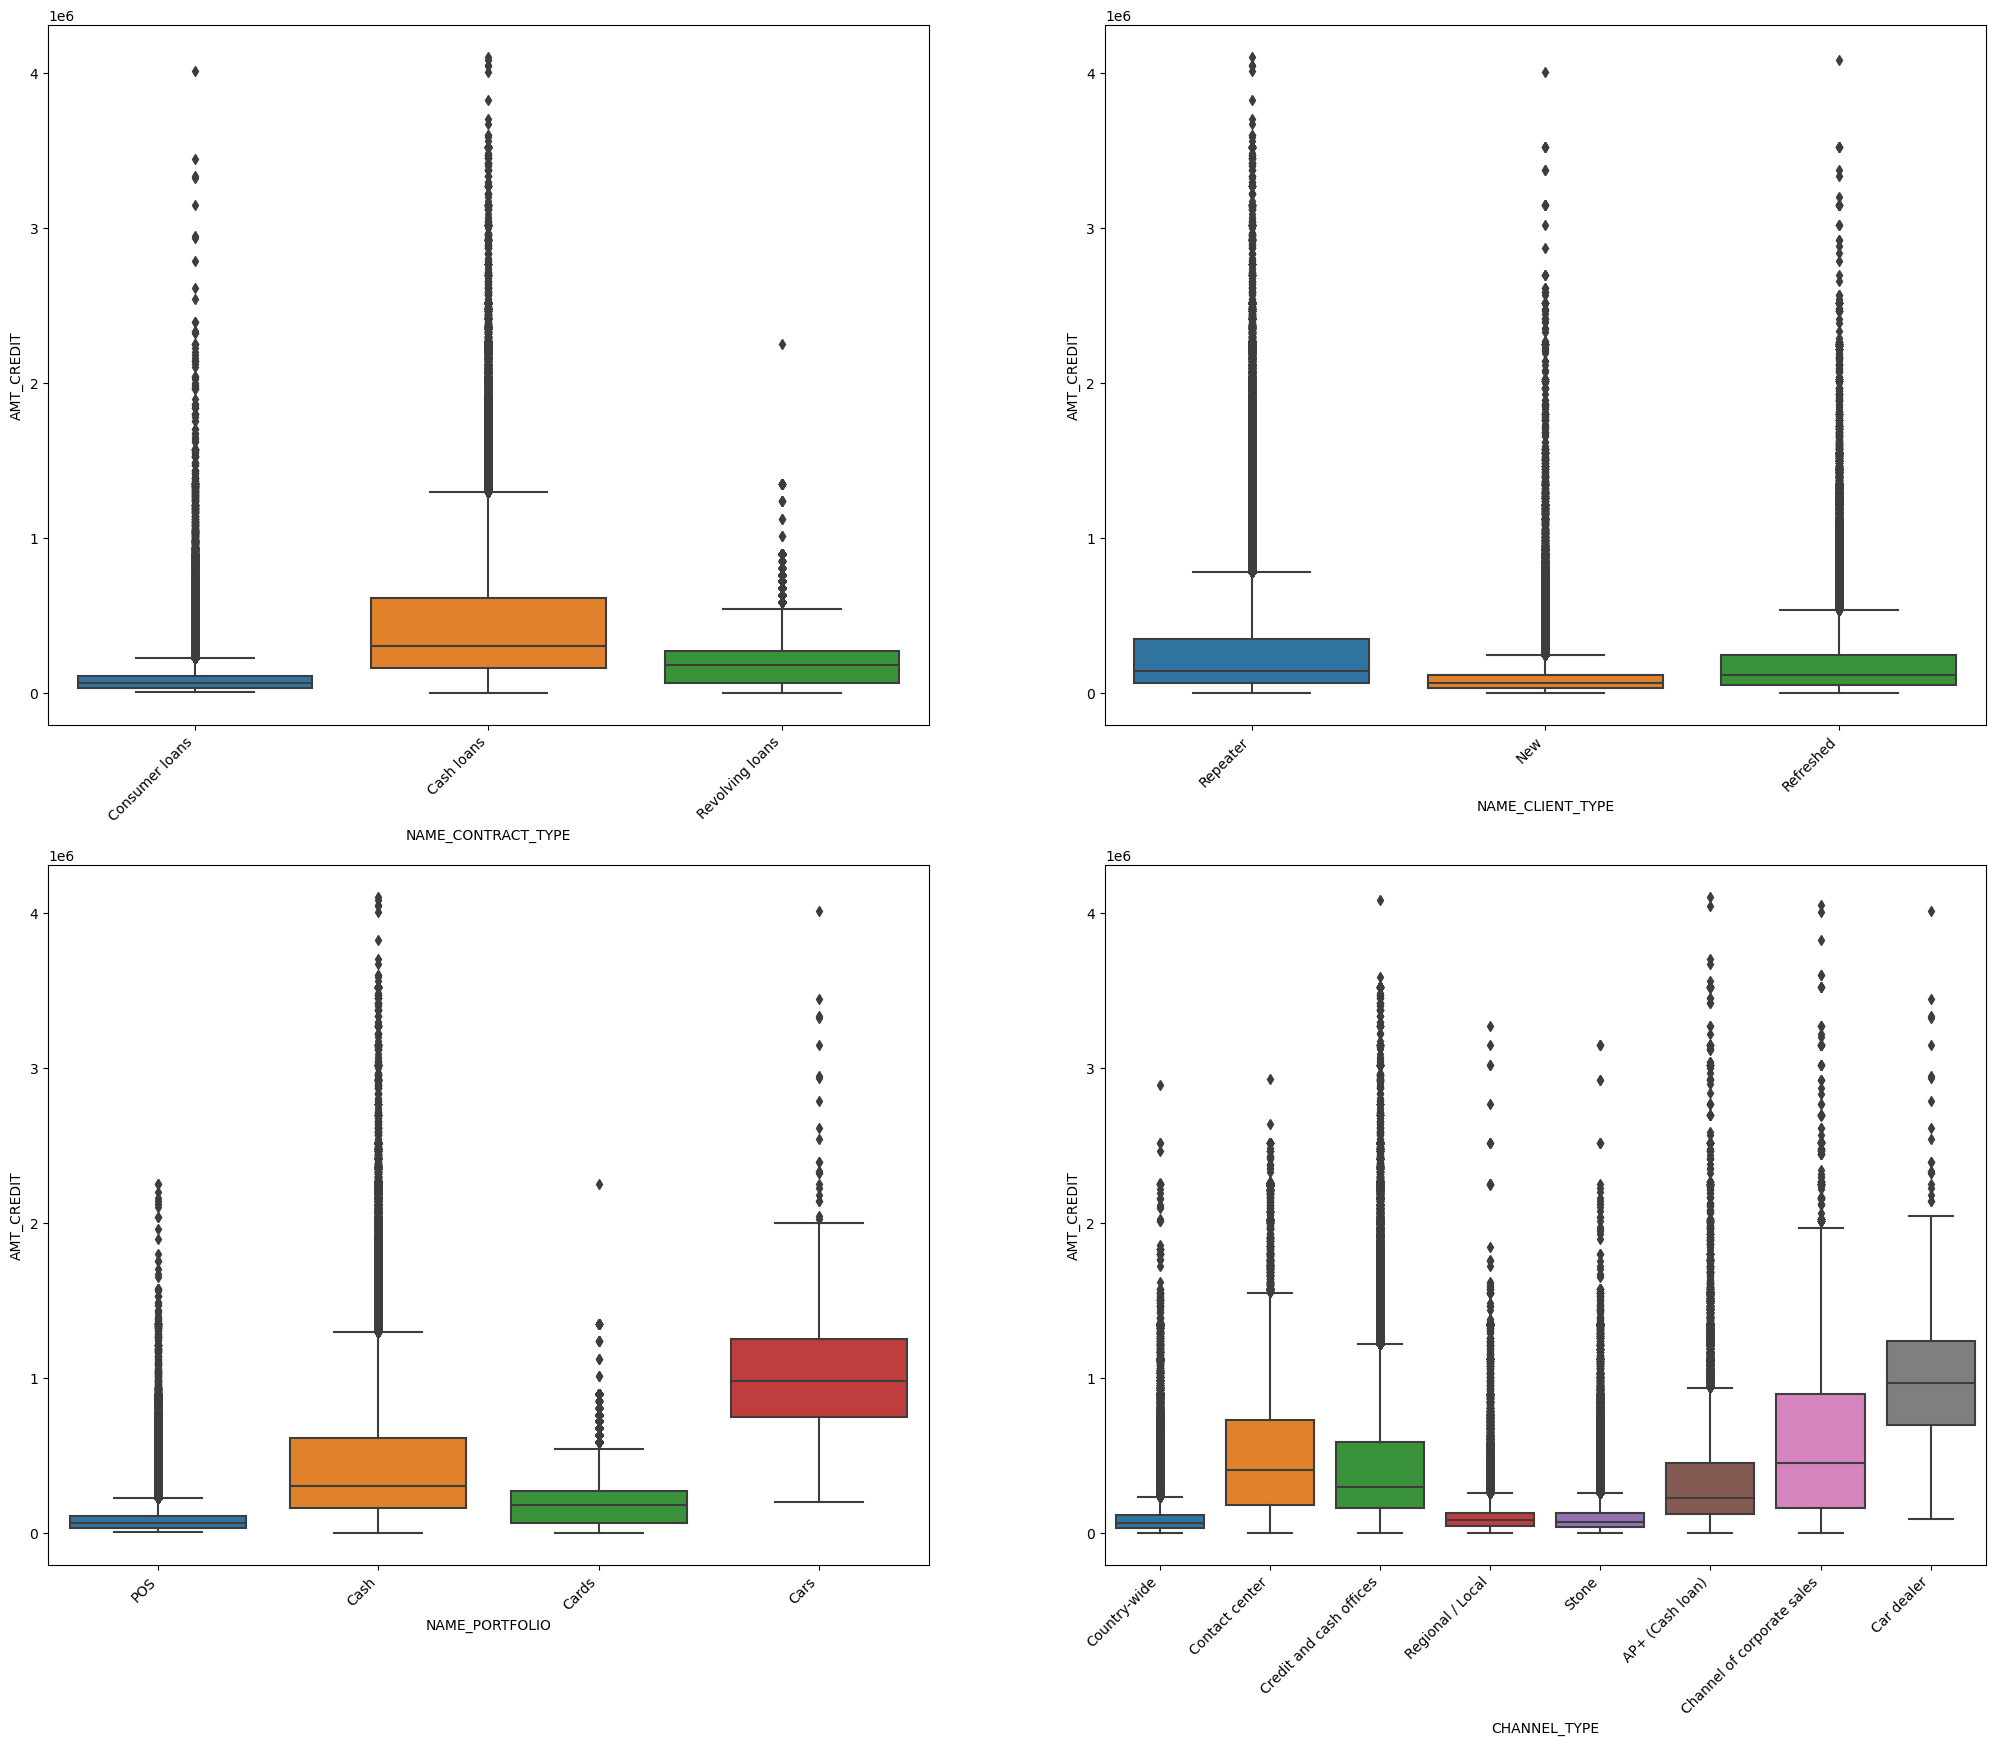

In [664]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Insight/Observation:
1. Cash loans have higher credit amount than Revolving and Consumer loans.
2. Repeater clients have higher credit amount as compared to New and Refreshed clients.
3. The Cars portfolio has most credit amount followed by Cash.
4. In terms of credit amount, channel types Car dealer, Channel of corporate sales, Contact center and Credit and cash offices have higher credit amount clients. The credit amount is very low for Regional/Local, Stone and Country-wide channels.

#### Analysis of two segmented variables

#### Contract status and Client type

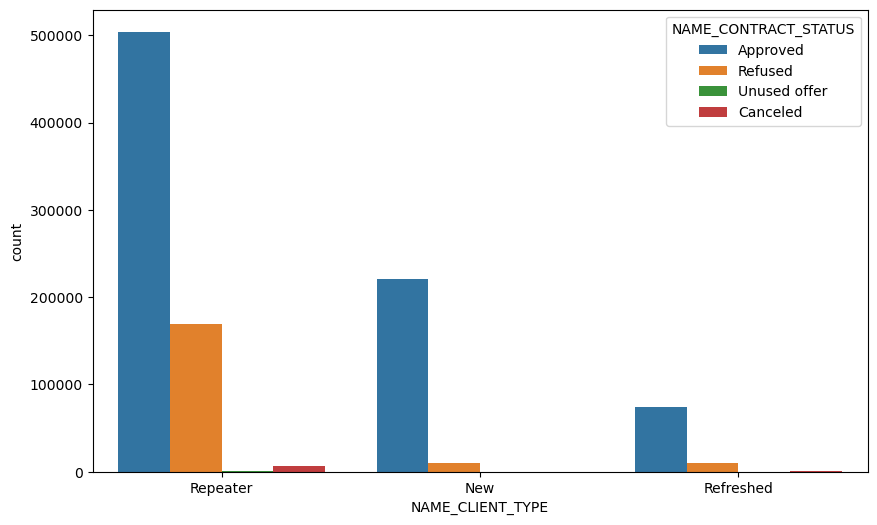

In [665]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )
plt.show()

##### Insight/Observation:
Repeater clients are the biggest category and have more approved loans as compared to New and Refreshed clients.

#### Current application defaulter status with respect to previous application status

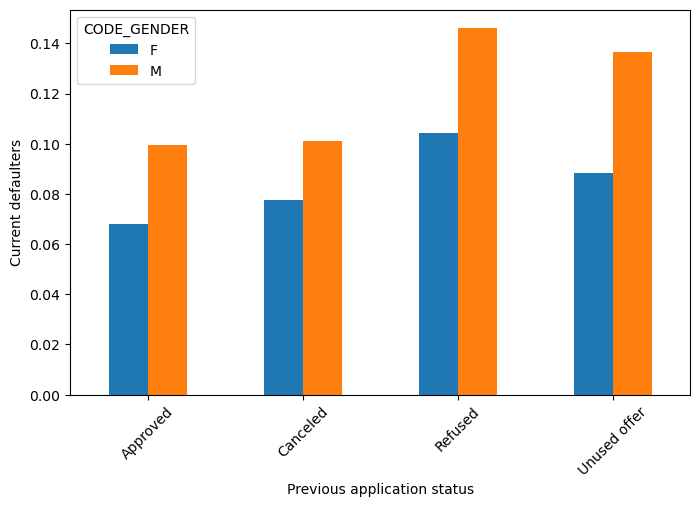

In [666]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous application status')
plt.ylabel('Current defaulters')
plt.show()

##### Insight/Observation:
1. Refused clients are more defaulted as compared to Approved clients.
2. Previously Approved and Cancelled have lower defaults
3. Males are more defaults than females for all previous status.

#### Current defaulter status with respect to previous application status and client types

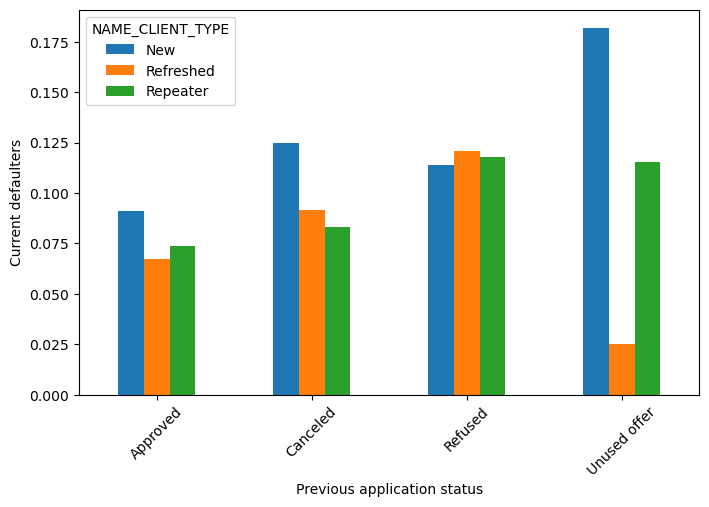

In [667]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous application status')
plt.ylabel('Current defaulters')
plt.show()

##### Insight/Observation:
1. Current Defaulters are higher for previously Unused offers status and New clients.
2. For previously Approved status, the New clients were more defaulted followed by Repeater.
3. For previously Refused status, the defaulters are more for Refreshed clients.
4. For previously Canceled status, the defaulters are more for New clients.

#### Current defaulter status with respect to previous application status and age group

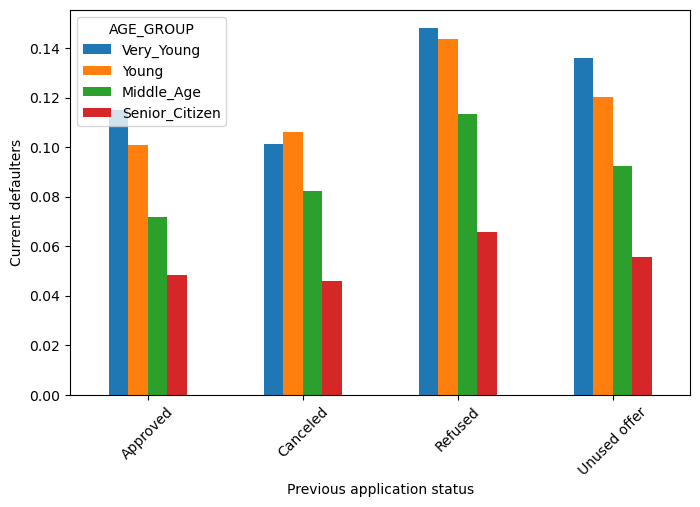

In [668]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous application status')
plt.ylabel('Current defaulters')
plt.show()

##### Insight/Observation:
1. For all the previous status, Very Young and Young applicants are more defaulted.
2. For all the previous status, Senior citizens are least defaulted compared to others.

#### Current defaulter status with respect to previous application status and income groups

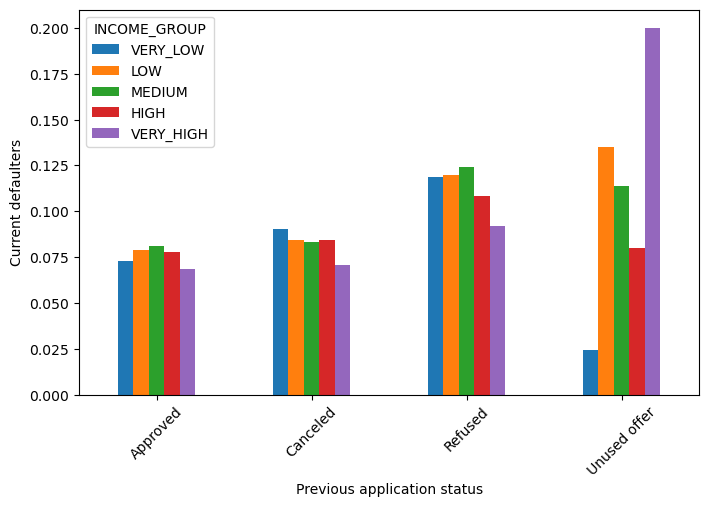

In [669]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous application status')
plt.ylabel('Current defaulters')
plt.show()

##### Insight/Observation:
1. For previously Unused offer, Low income group is least defaulted and Very High income group is most defaulted.
2. For other application status, all the income groups are equally defaulted for defaults.

#### Current defaulter status with respect to previous  application status and portfolio of the application

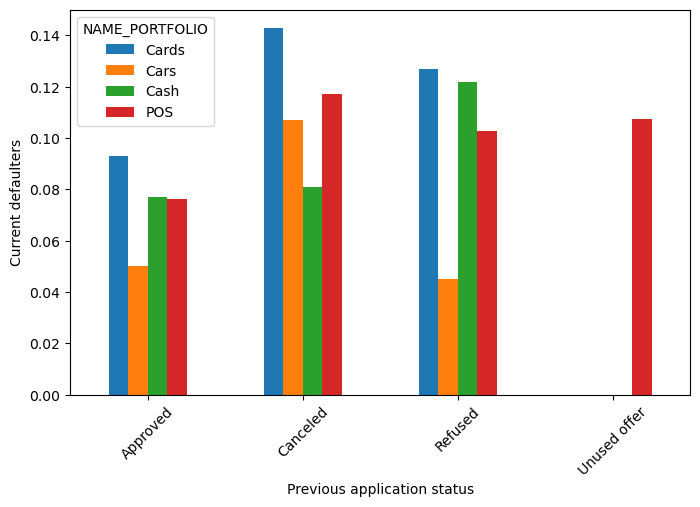

In [670]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous application status')
plt.ylabel('Current defaulters')
plt.show()

##### Insight/Observation:
1. Cards portfolio have maximum defaults as compared to other portfolios across different previous status.
2. For previously Approved and Refused status, Cars portfolio is least defaulted.

#### Current defaulter status with respect to previous  application status and external score category

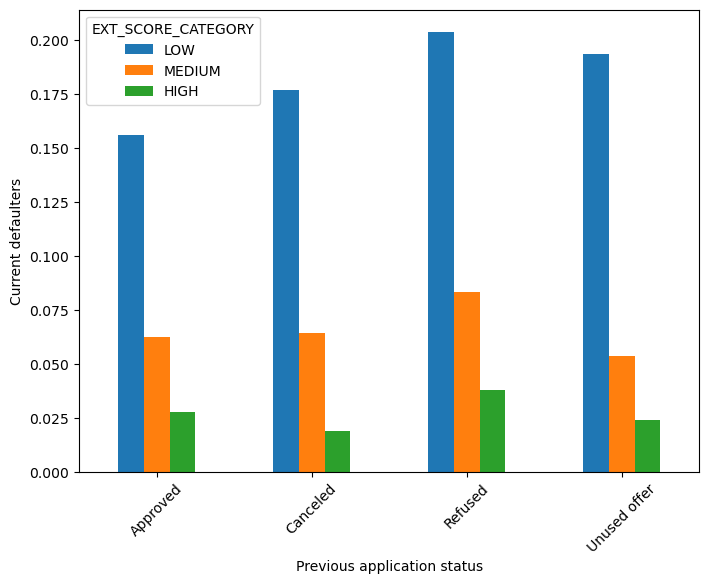

In [671]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous application status')
plt.ylabel('Current defaulters')
plt.show()

##### Insight/Observations:
1. Applicants with low external score are very likely to default irrespective of previous application status.
2. Applicants with hight external score are less likely to default irrespective of their previous application status.

## Insights and Recommendations

#### Highly Recommended client groups:
1.  Approved clients in previous application.
2. Senior citizens in all categories.
3. Clients with higher education and high income.
4. Client with high External Score.
5. Clients with married marital status.
6. Female clients as compared to males.

#### High Risk client groups:
1. Clients with previously refused, unused offers or cancelled applications.
2. Young clients are more likely to default as compared to middle aged and senior citizens. 
3. Lower secondary and secondary educated clients.
4. Clients with poor external score.
5. Clients with marital status - Single, separated, widow and civil partnership
6. Low income clients with previously refused application status.
